In [97]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.shape

(13320, 9)

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


__Data Exploration and Feature selection__

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df['area_type'].value_counts() # This a text type column. So checking the Occurance of area_type

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df1 = df.drop(['area_type','society','balcony','availability'],axis = 'columns')
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [7]:
df1.isnull().sum() #all null values shown

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df2 =df1.dropna() # dropping all null values at once. No null values now.
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

__Data Preprocessing and Cleaning__

___size column___

In [9]:
# df2['size'].value_counts() #returns key and count
df2['size'].unique() #returns key

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

__Trial1

In [10]:
x = "2 BHK"
x

'2 BHK'

In [11]:
x.split(" ") # SPLITTING USING SPACE

['2', 'BHK']

In [12]:
x.split(" ")[0] #first index value after splitting

'2'

In [13]:
x.split(" ")[1]

'BHK'

In [14]:
# Take each value of x 
# split using "space"
# Take the first element
# convert to integer
df2['bhk']= df2['size'].apply(lambda x: int(x.split(" ")[0]))

C:\Users\DELL\AppData\Local\Temp\ipykernel_3304\815461086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']= df2['size'].apply(lambda x: int(x.split(" ")[0]))


In [15]:
df2 #New column bhk created using split and apply lambda

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [16]:
df2['bhk'].unique() #43 BHK house ? Lets explore more.

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df2[df2['bhk']>20] #This seems an outliers. It has total Sq.ft of 2400 with 43 bedrooms.

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


___total_sqft column___

In [18]:
df2.total_sqft.unique() # Here we could see values like '1133 - 1384' which cannot be used for predictions

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_float(x):
    try:
        float(x) 
        # This doesnt actually convert the values to float. 
        # It checks if the value can be converted and returns a boolean.
        # If it cant: except handles it, and returns False.
        # If it can : Returns True
        
    except:
        return False # if x IS NOT CONVERTED TO INTEGER RETURN FALSE
    
    return True #ELSE RETURN TRUE AND CONVERT X TO INTEGER

In [20]:
# Try except allows us to use the negate(~)
# If the try is completed the values are shown as true.
# If try is not completed those values are shown by negate (~) as False.

In [21]:
df2[df2['total_sqft'].apply(is_float)] 
# Observe the total_sqft float values returned when try runs successfully. True executes
# It has int and float values for total_sqft

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [22]:
df2[df2['total_sqft'].apply(is_float)].total_sqft.unique().tolist() 
# Values when try executes successfully. True type values.
# All values are object type

['1056',
 '2600',
 '1440',
 '1521',
 '1200',
 '1170',
 '2732',
 '3300',
 '1310',
 '1020',
 '1800',
 '2785',
 '1000',
 '1100',
 '2250',
 '1175',
 '1180',
 '1540',
 '2770',
 '600',
 '1755',
 '2800',
 '1767',
 '510',
 '1250',
 '660',
 '1610',
 '1151',
 '1025',
 '1075',
 '1760',
 '1693',
 '1925',
 '700',
 '1070',
 '1724',
 '1290',
 '1143',
 '1296',
 '1254',
 '1330.74',
 '970',
 '1459',
 '800',
 '869',
 '1270',
 '1670',
 '2010',
 '1185',
 '1600',
 '1500',
 '1407',
 '840',
 '4395',
 '845',
 '5700',
 '1160',
 '3000',
 '1140',
 '1220',
 '1350',
 '1005',
 '500',
 '1358',
 '1569',
 '1240',
 '2089',
 '1206',
 '1150',
 '2511',
 '460',
 '4400',
 '1660',
 '1326',
 '1325',
 '1499',
 '1665',
 '708',
 '1060',
 '710',
 '1450',
 '2894',
 '1330',
 '2502',
 '650',
 '2400',
 '1007',
 '966',
 '1630',
 '1640',
 '782',
 '1260',
 '1413',
 '1116',
 '1530',
 '3700',
 '2497',
 '1436',
 '276',
 '1427',
 '2061',
 '2650',
 '1282',
 '1050',
 '945',
 '950',
 '1870',
 '880',
 '1535',
 '1360',
 '1280',
 '5000',
 '3050',


In [23]:
df2[~df2['total_sqft'].apply(is_float)] # negate of float values
# Value Returned when negate is used. Values from except.False.
# It contains all values except int and float for total_sqft

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [24]:
df2[~df2['total_sqft'].apply(is_float)].total_sqft.unique() 
# Value Returned when negate is used. Values from except.False.

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

Trial__

In [25]:
x = ("1079 - 1183")
tokens = x.split("-")
tokens

['1079 ', ' 1183']

In [26]:
tokens[0]

'1079 '

In [27]:
len(tokens)

2

In [28]:
type(tokens[0])

str

In [29]:
def sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens)==2:
        return((float(tokens[1])+float(tokens[0]))/len(tokens)) #converts to float when: if statement is true.
    try:
        return float(x) # returns value of float
    except:
        return None # returns none when both above statements fails to execute

In [30]:
x = ("1079 - 1183") #executes if: converts to float when: if statement is true.
sqft_to_num(x)

1131.0

In [31]:
x = ("10791183") #executes try: returns value of float
sqft_to_num(x)

10791183.0

In [32]:
x = ("300Sq. Yards") # executes except:  returns none when both above statements fail to execute
sqft_to_num(x)

In [33]:
df2['total_sqft'].apply(sqft_to_num) #applying function

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [34]:
df2['total_sqft'].apply(sqft_to_num).dtype # all values are float now(also some are NA: due to except, handled further)

dtype('float64')

In [35]:
#checking the values
list(df2['total_sqft'].apply(sqft_to_num).unique()) 

[1056.0,
 2600.0,
 1440.0,
 1521.0,
 1200.0,
 1170.0,
 2732.0,
 3300.0,
 1310.0,
 1020.0,
 1800.0,
 2785.0,
 1000.0,
 1100.0,
 2250.0,
 1175.0,
 1180.0,
 1540.0,
 2770.0,
 600.0,
 1755.0,
 2800.0,
 1767.0,
 510.0,
 1250.0,
 660.0,
 1610.0,
 1151.0,
 1025.0,
 2475.0,
 1075.0,
 1760.0,
 1693.0,
 1925.0,
 700.0,
 1070.0,
 1724.0,
 1290.0,
 1143.0,
 1296.0,
 1254.0,
 1330.74,
 970.0,
 1459.0,
 800.0,
 869.0,
 1270.0,
 1670.0,
 2010.0,
 1185.0,
 1600.0,
 1500.0,
 1407.0,
 840.0,
 4395.0,
 845.0,
 5700.0,
 1160.0,
 3000.0,
 1140.0,
 1220.0,
 1350.0,
 1005.0,
 500.0,
 1358.0,
 1569.0,
 1240.0,
 2089.0,
 1206.0,
 1150.0,
 2511.0,
 460.0,
 4400.0,
 1660.0,
 1326.0,
 1325.0,
 1499.0,
 1665.0,
 708.0,
 1060.0,
 710.0,
 1450.0,
 2894.0,
 1330.0,
 2502.0,
 650.0,
 2400.0,
 1007.0,
 966.0,
 1630.0,
 1640.0,
 782.0,
 1260.0,
 1413.0,
 1116.0,
 1530.0,
 3700.0,
 2497.0,
 1436.0,
 276.0,
 1427.0,
 2061.0,
 5611.5,
 2650.0,
 1282.0,
 1050.0,
 945.0,
 950.0,
 1870.0,
 880.0,
 1535.0,
 1360.0,
 1073.5,
 1

In [36]:
df3= df2.copy()
df3['total_sqft'] = df2['total_sqft'].apply(sqft_to_num) #applying function and assigning to column
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [37]:
df3.total_sqft.isnull().sum() # null values in total_sqft

46

In [38]:
# Dataframe of null values in total_sqft (nan values are injected due to except condition)
# total 46 null values
df3[df3.total_sqft.isnull()] 

,location,size,total_sqft,bath,price,bhk
410,Kengeri,1 BHK,NaN,1.0,18.50,1
648,Arekere,9 Bedroom,NaN,9.0,265.00,9
775,Basavanagara,1 BHK,NaN,2.0,93.00,1
872,Singapura Village,2 BHK,NaN,2.0,45.00,2
1019,Marathi Layout,1 Bedroom,NaN,1.0,110.00,1
1086,Narasapura,2 Bedroom,NaN,2.0,29.50,2
1400,Chamrajpet,9 BHK,NaN,9.0,296.00,9
1712,Singena Agrahara,3 Bedroom,NaN,3.0,95.00,3
1743,Hosa Road,3 BHK,NaN,3.0,115.00,3
1821,Sarjapur,3 Bedroom,NaN,3.0,76.00,3


In [39]:
#Accessing the index of null values
df3[df3.total_sqft.isnull()].index

Int64Index([  410,   648,   775,   872,  1019,  1086,  1400,  1712,  1743,
             1821,  2310,  2881,  3228,  3285,  4113,  4293,  5453,  5537,
             5631,  5668,  5708,  5976,  6268,  6303,  6333,  6552,  6592,
             6953,  7001,  7248,  7334,  7520,  7607,  7726,  8273,  9423,
             9519,  9734, 10488, 10491, 11320, 11615, 12186, 12252, 12560,
            12652],
           dtype='int64')

In [40]:
# Checking nan for any random index in above list
df3.total_sqft[410]

nan

In [41]:
df3.total_sqft.notnull().sum()

13200

In [42]:
# 13200 non null values
df3[df3.total_sqft.notnull()]

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [43]:
# Creating new dataframe df3 consisting no null values of total_sqft
df3 = df3[df3.total_sqft.notnull()]
df3.shape

(13200, 6)

In [44]:
df2.loc[30] # Compare total_sqft converted to mean value in below cell.

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

In [45]:
df3.loc[30] # observe the total_sqft converted to mean value

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [46]:
df3.total_sqft.dtype # All values are float.

dtype('float64')

__price_per_sqft column__

In [47]:
# Calcualting and Creating NEW price per sq ft column.
df4 = df3.copy() 
df4['price_per_sqft'] = (df4['price']*100000)/df4['total_sqft'] 
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [48]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


__location column__

In [49]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [50]:
len(df4.location.unique()) #1298 categories is quite a big number
# df4.location.unique().shape

1298

In [51]:
df4['location'].value_counts() #same
# df4.groupby('location')['location'].agg('count').sort_values(ascending = False) # same

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [52]:
# Removing any extra spaces in the text.
df4['location']= df4.location.apply(lambda x: x.strip()) 
location_stats = df4['location'].value_counts() 
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [53]:
location_stats[location_stats==1]

Konappana Agrahara           1
7th Block Koramangala        1
Devarabisanahalli            1
HOSUR RMAIN ROAD             1
Vinayaka Layout              1
                            ..
Rajanna Layout               1
Subramanyanagar              1
Lakshmipura Vidyaanyapura    1
Malur Hosur Road             1
Abshot Layout                1
Name: location, Length: 471, dtype: int64

In [54]:
# len(df4['location'].value_counts()[df4['location'].value_counts()==1])   #same
len(location_stats[location_stats==1])                                     #same
# 471 categories that have value_count as 1

471

In [55]:
len(location_stats[location_stats<=10])
# 1047 categories that have value_count less than equal to 10

1047

In [56]:
# Assigning variable
location_stats_lessthan10= location_stats[location_stats<=10]
location_stats_lessthan10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [57]:
len(location_stats_lessthan10) # length is 1047

1047

In [58]:
location_stats_lessthan10.sum() # Total count is 2872

2872

In [59]:
# Converting all categories having count below 10 as other. 
# If category is in location_stats_lessthan10 it will be marked as 'other'
# else original value will be kept.
# This will reduce the categories significantly.

df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_lessthan10 else x)
len(df4.location.unique())

241

In [60]:
df4.location.value_counts() 
#2872 categories having count<=10 converted to other.Look in the table below.

other              2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: location, Length: 241, dtype: int64

## Outliers Detection and removal__

___sqft per bed___

In [61]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [62]:
df4[(df4.total_sqft/df4.bhk)<300] # Outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [63]:
df4[(df4.total_sqft/df4.bhk)<300].shape # 744 outliers below 300sqft per bed

(744, 7)

In [64]:
df4.shape # original df shape with outliers

(13200, 7)

In [65]:
13200-744

12456

In [66]:
# Removing outliers by Taking Negate and assigning to new dataframe. 
# Negate is the opposite. Taking values above 300
df5 = df4[~((df4.total_sqft/df4.bhk)<300)]
df5.shape

(12456, 7)

In [67]:
df4.shape[0]-df5.shape[0]  # 744 outliers below 300sqft per bed removed.

744

In [68]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


___Price per sqft__

In [69]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

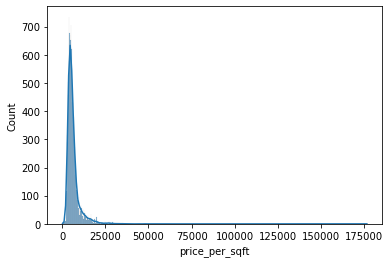

In [70]:
# Plotting the Distribution curve using seaborn
import seaborn as sn
sn.histplot(df5.price_per_sqft,kde=True) #hist with kde= True (plots the curve)

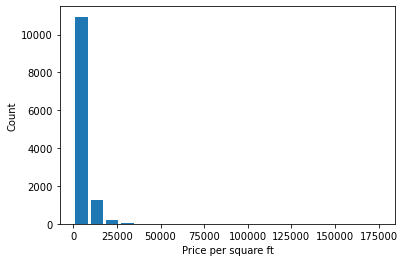

In [71]:
# Histogram also shows the same thing that how data points are widely scattered
plt.hist(df5.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

In [72]:
df_out1 = pd.DataFrame()
df_out1

""


In [73]:
type(df5.groupby('location'))

pandas.core.groupby.generic.DataFrameGroupBy

In [74]:
df5.groupby('location').describe()

total_sqft                                    \
                               count         mean          std     min   
location                                                                 
1st Block Jayanagar             10.0  1915.000000   667.549416  1000.0   
1st Phase JP Nagar              23.0  1800.695652   800.365169   840.0   
2nd Phase Judicial Layout       11.0  1173.272727   341.193227   525.0   
2nd Stage Nagarbhavi             9.0  2127.777778  1013.382674  1200.0   
5th Block Hbr Layout             7.0  2112.571429  1589.967175  1100.0   
...                              ...          ...          ...     ...   
Yelahanka                      205.0  1776.041463  2976.915456   567.0   
Yelahanka New Town              38.0  1215.526316   762.328252   350.0   
Yelenahalli                     13.0  1268.461538   190.068240  1056.0   
Yeshwanthpur                    80.0  1454.343750   616.906316   400.0   
other                         2557.0  1763.514013  1952.228452   375.0   

                                                                bath  \
                               25%     50%      75%      max   count   
location                                                               
1st Block Jayanagar        1333.75  1817.5  2437.50   2850.0    10.0   
1st Phase JP Nagar         1202.50  1590.0  2071.00   4550.0    23.0   
2nd Phase Judicial Layout  1025.00  1300.0  1350.00   1681.0    11.0   
2nd Stage Nagarbhavi       1350.00  1500.0  3000.00   4000.0     9.0   
5th Block Hbr Layout       1203.00  1270.0  2456.00   5100.0     7.0   
...                            ...     ...      ...      ...     ...   
Yelahanka                  1104.00  1327.0  1650.00  35000.0   205.0   
Yelahanka New Town          650.00  1050.0  1584.50   4000.0    38.0   
Yelenahalli                1160.00  1200.0  1260.00   1650.0    13.0   
Yeshwanthpur               1161.75  1381.5  1825.25   3600.0    80.0   
other                      1117.00  1344.0  1800.00  52272.0  2557.0   

                                     ...  bhk       price_per_sqft  \
                               mean  ...  75%   max          count   
location                             ...                             
1st Block Jayanagar        3.100000  ...  4.0   4.0           10.0   
1st Phase JP Nagar         3.043478  ...  4.0   5.0           23.0   
2nd Phase Judicial Layout  2.090909  ...  3.0   3.0           11.0   
2nd Stage Nagarbhavi       4.666667  ...  5.0   6.0            9.0   
5th Block Hbr Layout       3.142857  ...  4.5   6.0            7.0   
...                             ...  ...  ...   ...            ...   
Yelahanka                  2.458537  ...  3.0   6.0          205.0   
Yelahanka New Town         1.868421  ...  3.0   4.0           38.0   
Yelenahalli                2.153846  ...  2.0   3.0           13.0   
Yeshwanthpur               2.400000  ...  3.0   6.0           80.0   
other                      2.711381  ...  3.0  16.0         2557.0   

                                                                   \
                                   mean          std          min   
location                                                            
1st Block Jayanagar        12359.253758  3931.939592  6000.000000   
1st Phase JP Nagar          9726.405918  4802.127570  5274.725275   
2nd Phase Judicial Layout   4048.701183   674.730658  3500.000000   
2nd Stage Nagarbhavi       14381.275720  5272.435848  5666.666667   
5th Block Hbr Layout        6622.120076  4675.410553  3611.111111   
...                                 ...          ...          ...   
Yelahanka                   5204.894684  1746.405991   371.428571   
Yelahanka New Town          5860.659870  3889.233175  1875.000000   
Yelenahalli                 4012.550871   533.259531  3125.000000   
Yeshwanthpur                6620.544179  2028.990461  3200.000000   
other                       7477.935577  6411.986629   267.829813   

                                

Trial__

In [75]:
# by iterating we get dataframe for each location.
# Separate dataframes for each can be created
for i, j in df5.groupby('location'): 
    print (i,j.shape)

1st Block Jayanagar (10, 7)
1st Phase JP Nagar (23, 7)
2nd Phase Judicial Layout (11, 7)
2nd Stage Nagarbhavi (9, 7)
5th Block Hbr Layout (7, 7)
5th Phase JP Nagar (35, 7)
6th Phase JP Nagar (20, 7)
7th Phase JP Nagar (145, 7)
8th Phase JP Nagar (53, 7)
9th Phase JP Nagar (35, 7)
AECS Layout (12, 7)
Abbigere (22, 7)
Akshaya Nagar (60, 7)
Ambalipura (27, 7)
Ambedkar Nagar (31, 7)
Amruthahalli (23, 7)
Anandapura (24, 7)
Ananth Nagar (29, 7)
Anekal (36, 7)
Anjanapura (16, 7)
Ardendale (24, 7)
Arekere (15, 7)
Attibele (42, 7)
BEML Layout (12, 7)
BTM 2nd Stage (28, 7)
BTM Layout (15, 7)
Babusapalaya (24, 7)
Badavala Nagar (12, 7)
Balagere (45, 7)
Banashankari (69, 7)
Banashankari Stage II (14, 7)
Banashankari Stage III (23, 7)
Banashankari Stage V (12, 7)
Banashankari Stage VI (11, 7)
Banaswadi (15, 7)
Banjara Layout (8, 7)
Bannerghatta (15, 7)
Bannerghatta Road (150, 7)
Basavangudi (29, 7)
Basaveshwara Nagar (16, 7)
Battarahalli (21, 7)
Begur (16, 7)
Begur Road (81, 7)
Bellandur (95, 7)
Be

In [76]:
# accessing mean of ppsf for each location instance
for i, j in df5.groupby('location'):
    mean = np.mean(j.price_per_sqft) 
    print (i,mean) 

1st Block Jayanagar 12359.253757566757
1st Phase JP Nagar 9726.405917927166
2nd Phase Judicial Layout 4048.7011831449663
2nd Stage Nagarbhavi 14381.275720164609
5th Block Hbr Layout 6622.1200762730805
5th Phase JP Nagar 5125.691217297704
6th Phase JP Nagar 7326.205543307713
7th Phase JP Nagar 6411.47826407051
8th Phase JP Nagar 5535.718520714688
9th Phase JP Nagar 5065.943928360469
AECS Layout 4841.772008338319
Abbigere 4070.194815595674
Akshaya Nagar 5546.576567351514
Ambalipura 6323.831878099614
Ambedkar Nagar 7447.72466192013
Amruthahalli 6048.669213878912
Anandapura 4668.796240425284
Ananth Nagar 3320.3352926715156
Anekal 3705.407314280221
Anjanapura 5198.809311859629
Ardendale 6010.168506961792
Arekere 5586.513703697031
Attibele 3939.409113672177
BEML Layout 7426.885217563254
BTM 2nd Stage 9164.829466964551
BTM Layout 5997.953632845194
Babusapalaya 4081.8126194641336
Badavala Nagar 6315.129107762856
Balagere 6111.5627400841295
Banashankari 6290.11330193452
Banashankari Stage II 13

In [77]:
# accessing std dev of ppsf for each location instance
for i, j in df5.groupby('location'):
    std_dev = np.std(j.price_per_sqft)
    print (i,std_dev)

1st Block Jayanagar 3730.1654195657898
1st Phase JP Nagar 4696.573415034759
2nd Phase Judicial Layout 643.3304399655544
2nd Stage Nagarbhavi 4970.900188596673
5th Block Hbr Layout 4328.589064980405
5th Phase JP Nagar 1040.4791847067909
6th Phase JP Nagar 2701.915827190839
7th Phase JP Nagar 2279.0745890270427
8th Phase JP Nagar 3374.0874570241326
9th Phase JP Nagar 2107.56065255009
AECS Layout 863.2205938839423
Abbigere 1414.4094499037592
Akshaya Nagar 1657.4897040469916
Ambalipura 1981.1277616414047
Ambedkar Nagar 2079.758767437019
Amruthahalli 2807.846685293321
Anandapura 1127.8066960262986
Ananth Nagar 1050.4196430278525
Anekal 985.282459989774
Anjanapura 3060.1092773285895
Ardendale 1293.4051043067254
Arekere 1314.4040236326343
Attibele 2079.991399726797
BEML Layout 6189.0524110205515
BTM 2nd Stage 6098.890725793268
BTM Layout 1852.4523589356709
Babusapalaya 1176.4186841154801
Badavala Nagar 494.56006563014046
Balagere 937.328034432029
Banashankari 3250.879792692051
Banashankari St

In [78]:
# finding upper and lower limits for each location instance (std dev = +_1)
for i, j in df5.groupby('location'):
    mean = np.mean(j.price_per_sqft)         # mean values
    std_dev = np.std(j.price_per_sqft)       # standard dev values
    lower_limit = mean - 1*std_dev           # Taking 1 sta dev for lower limit
    upper_limit = mean + 1*std_dev           # Taking 1 sta dev for upper limit
    print (lower_limit,upper_limit)

8629.088338000967 16089.419177132548
5029.832502892407 14422.979332961924
3405.370743179412 4692.031623110521
9410.375531567937 19352.17590876128
2293.5310112926754 10950.709141253486
4085.2120325909127 6166.1704020044945
4624.289716116874 10028.121370498553
4132.403675043467 8690.552853097553
2161.631063690555 8909.80597773882
2958.383275810379 7173.504580910559
3978.5514144543768 5704.992602222262
2655.7853656919146 5484.604265499433
3889.086863304523 7204.066271398506
4342.70411645821 8304.959639741019
5367.965894483111 9527.483429357148
3240.822528585591 8856.515899172233
3540.9895443989853 5796.6029364515825
2269.915649643663 4370.754935699368
2720.124854290447 4690.689774269995
2138.7000345310394 8258.918589188219
4716.763402655067 7303.573611268518
4272.109680064396 6900.9177273296655
1859.41771394538 6019.400513398974
1237.8328065427022 13615.937628583804
3065.9387411712833 15263.720192757819
4145.501273909524 7850.4059917808645
2905.3939353486535 5258.231303579614
5820.5690421

In [80]:
df6= pd.DataFrame()                     # Temporary dataframe(initial df)
for i, j in df5.groupby('location'):
    mean = np.mean(j.price_per_sqft)         # mean values
    std_dev = np.std(j.price_per_sqft)       # standard dev values
    lower_limit = mean - 1*std_dev           # Taking 1 sta dev for lower limit
    upper_limit = mean + 1*std_dev           # Taking 1 sta dev for upper limit
    j_df= j[(j.price_per_sqft>lower_limit) & (j.price_per_sqft<upper_limit)] # instance dataframe
    df6 = pd.concat([df6, j_df])     # concatenating instance df to initial df
df6 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
13285,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [85]:
df5.shape

(12456, 7)

In [86]:
df6.shape

(10242, 7)

In [87]:
df5.shape[0]-df6.shape[0]

2214

1st Block Jayanagar


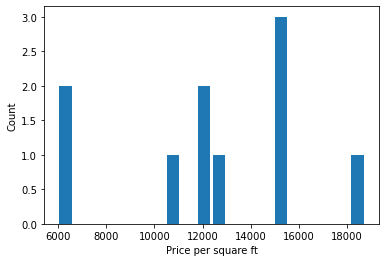

1st Phase JP Nagar


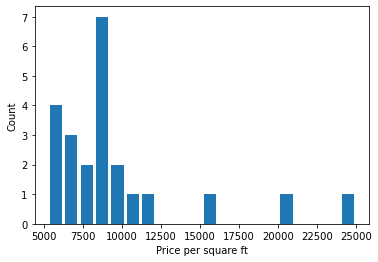

2nd Phase Judicial Layout


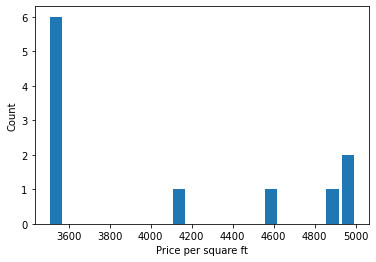

2nd Stage Nagarbhavi


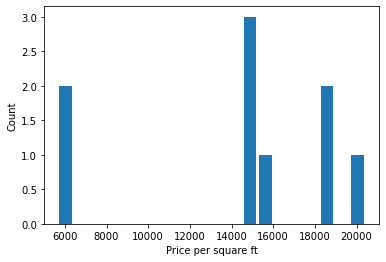

5th Block Hbr Layout


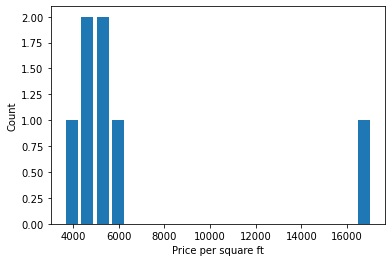

5th Phase JP Nagar


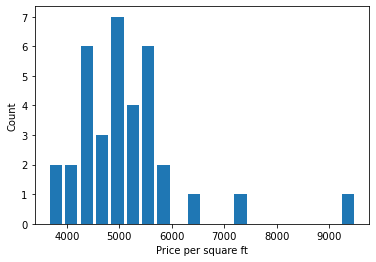

6th Phase JP Nagar


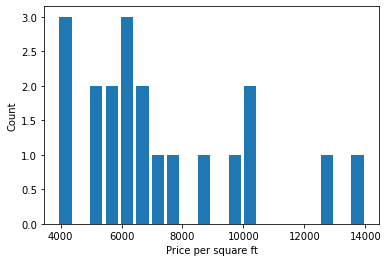

7th Phase JP Nagar


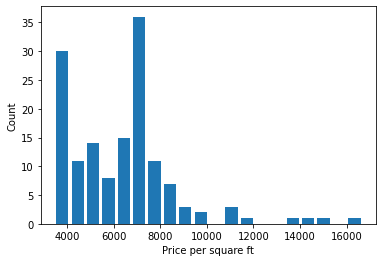

8th Phase JP Nagar


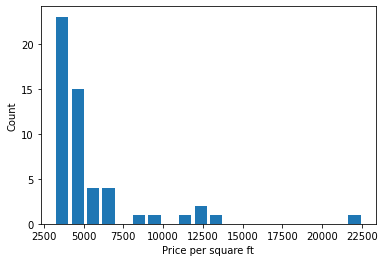

9th Phase JP Nagar


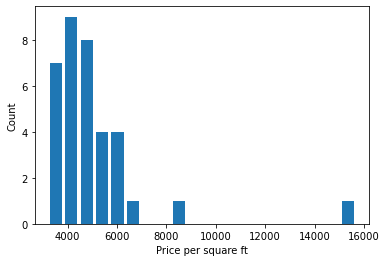

AECS Layout


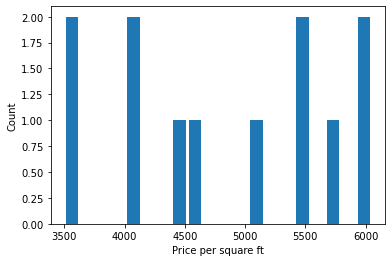

Abbigere


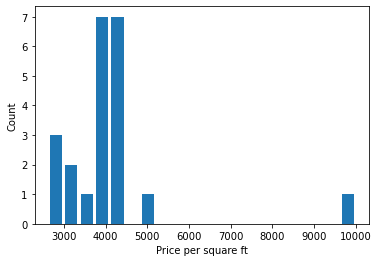

Akshaya Nagar


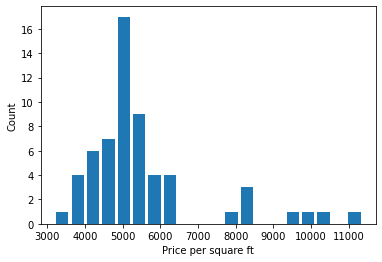

Ambalipura


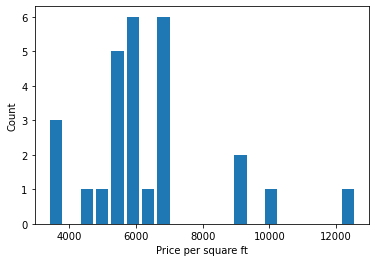

Ambedkar Nagar


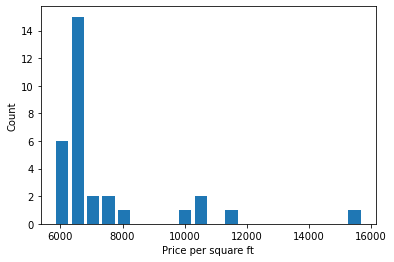

Amruthahalli


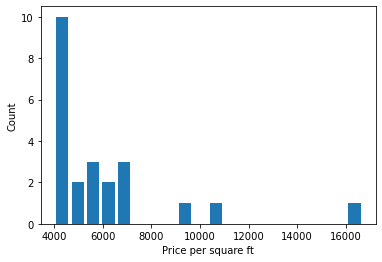

Anandapura


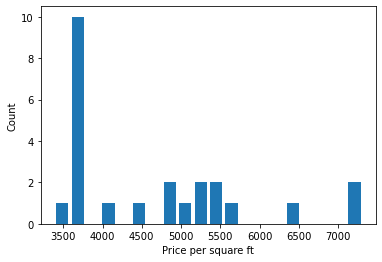

Ananth Nagar


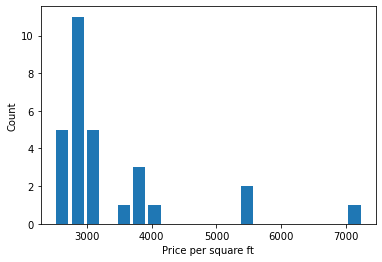

Anekal


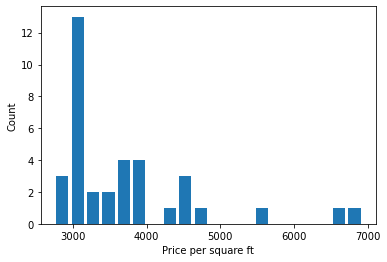

Anjanapura


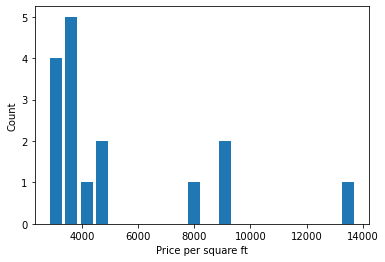

Ardendale


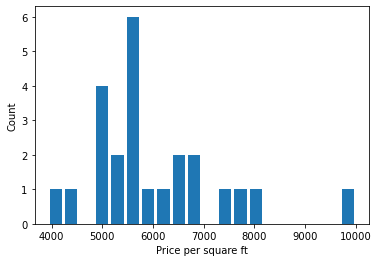

Arekere


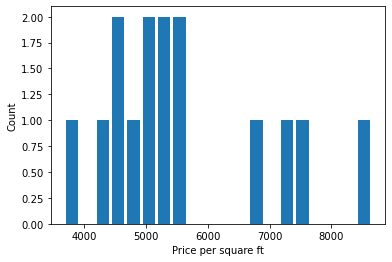

Attibele


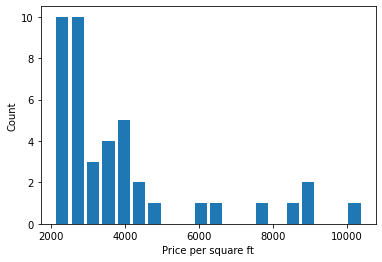

BEML Layout


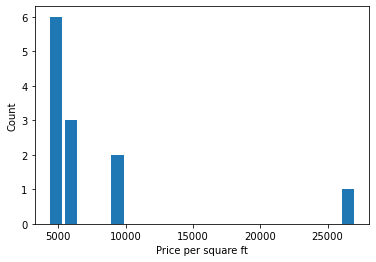

BTM 2nd Stage


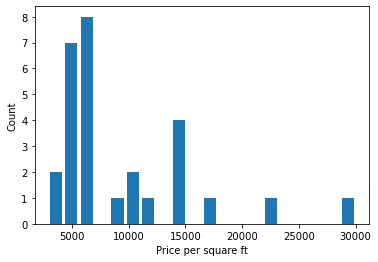

BTM Layout


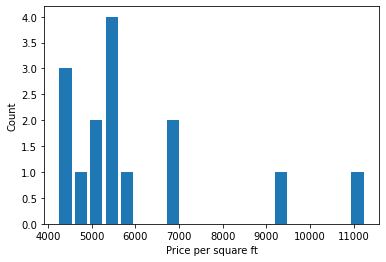

Babusapalaya


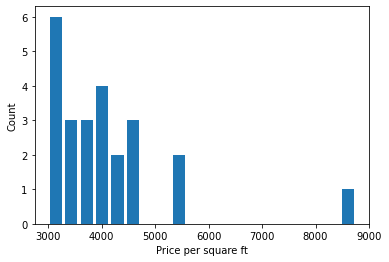

Badavala Nagar


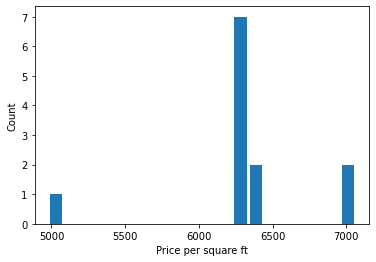

Balagere


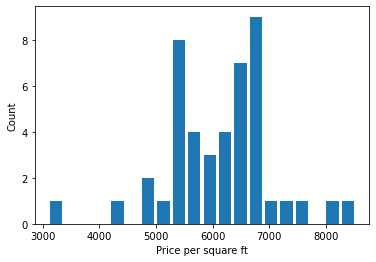

Banashankari


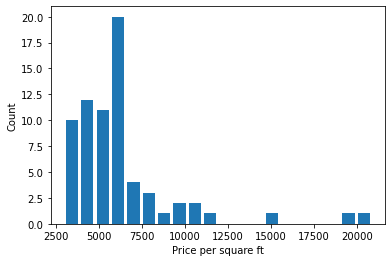

Banashankari Stage II


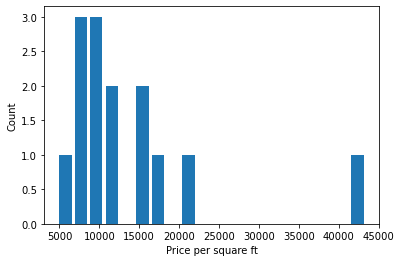

Banashankari Stage III


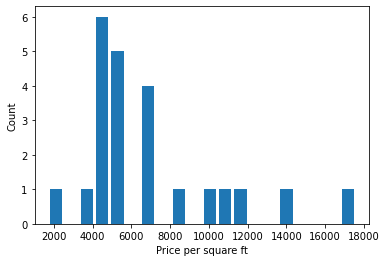

Banashankari Stage V


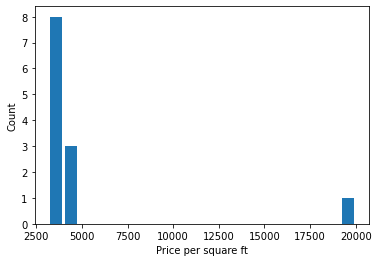

Banashankari Stage VI


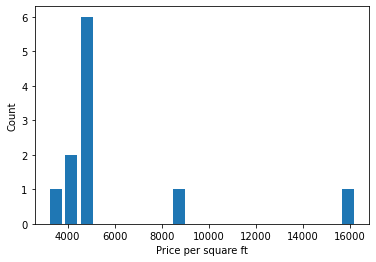

Banaswadi


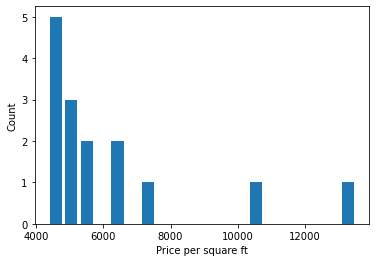

Banjara Layout


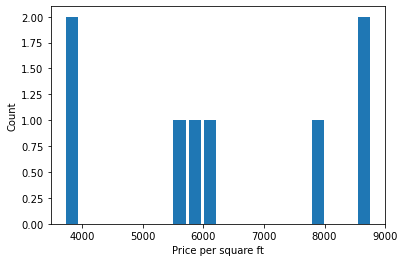

Bannerghatta


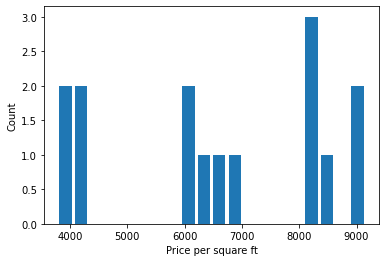

Bannerghatta Road


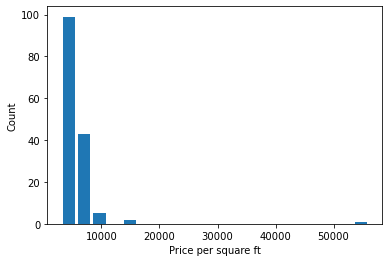

Basavangudi


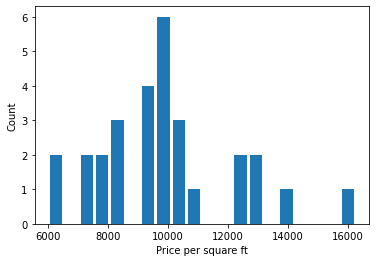

Basaveshwara Nagar


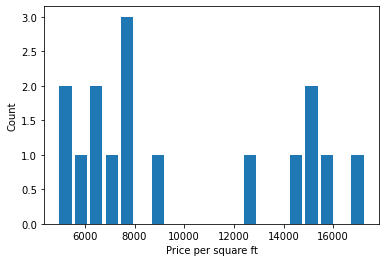

Battarahalli


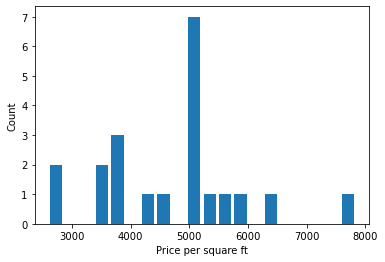

Begur


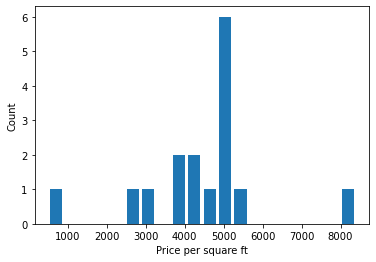

Begur Road


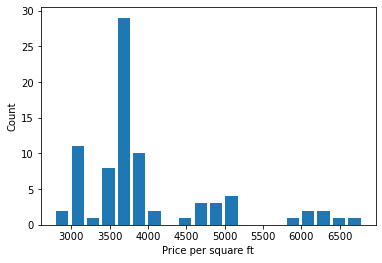

Bellandur


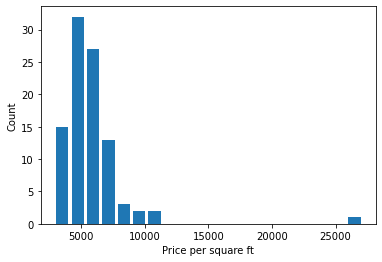

Benson Town


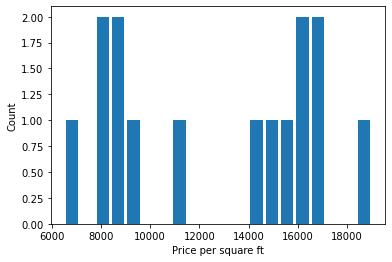

Bharathi Nagar


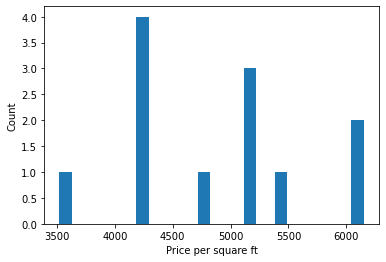

Bhoganhalli


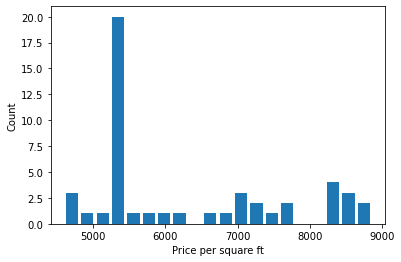

Billekahalli


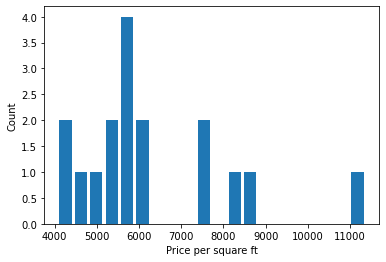

Binny Pete


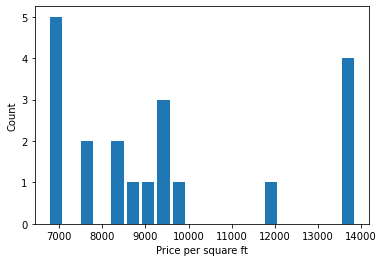

Bisuvanahalli


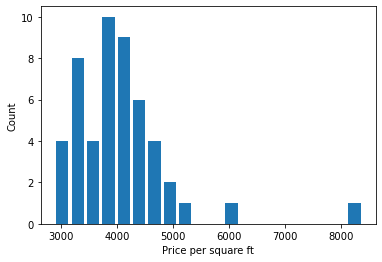

Bommanahalli


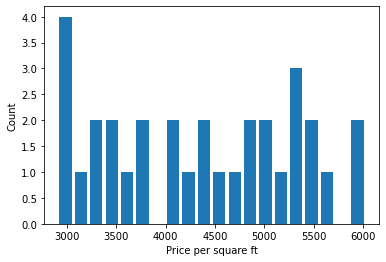

Bommasandra


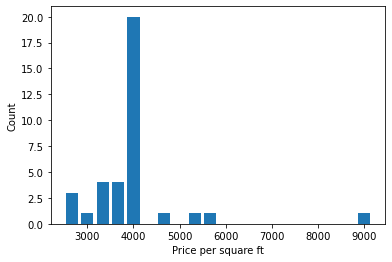

Bommasandra Industrial Area


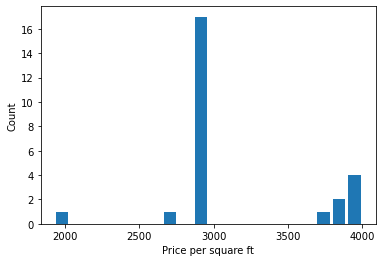

Bommenahalli


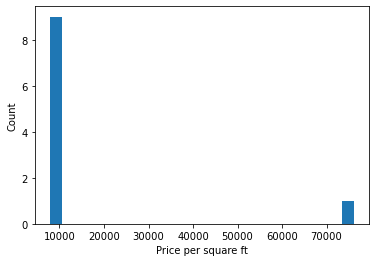

Brookefield


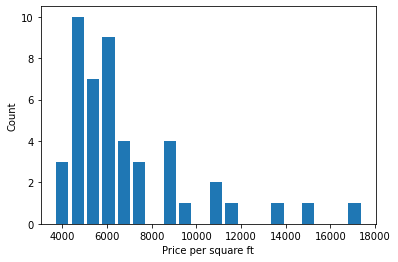

Budigere


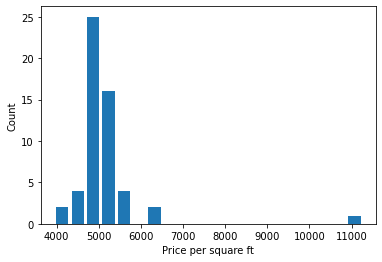

CV Raman Nagar


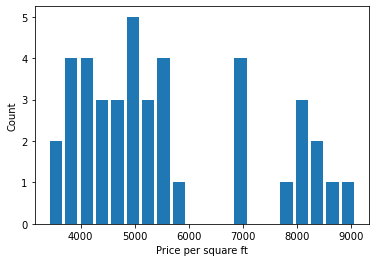

Chamrajpet


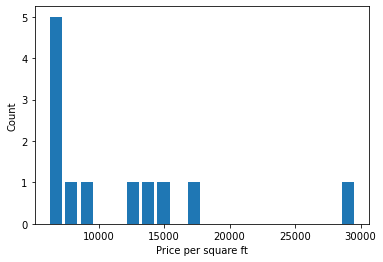

Chandapura


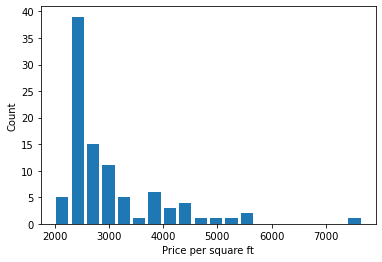

Channasandra


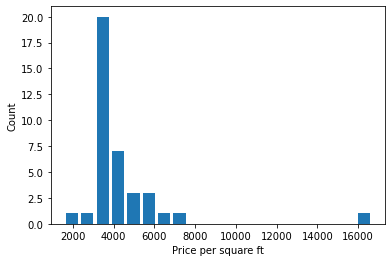

Chikka Tirupathi


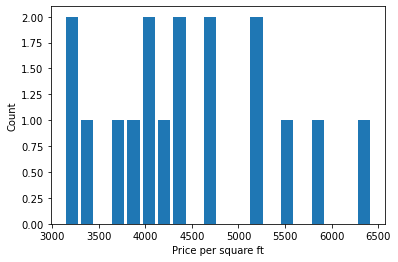

Chikkabanavar


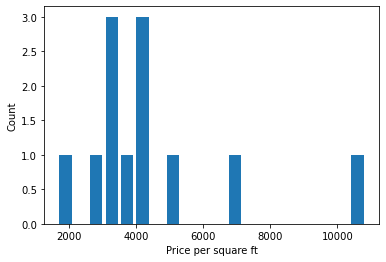

Chikkalasandra


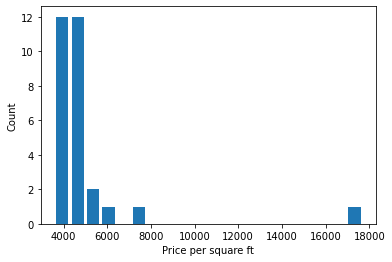

Choodasandra


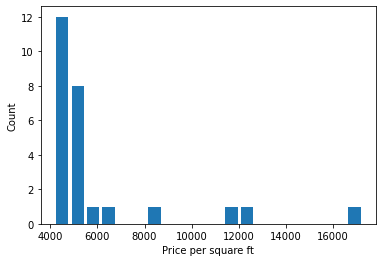

Cooke Town


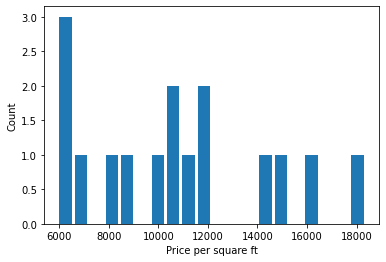

Cox Town


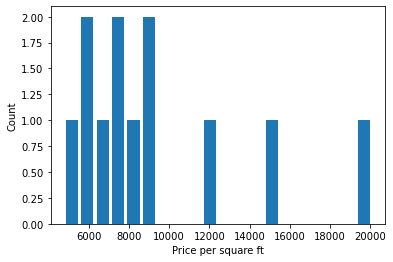

Cunningham Road


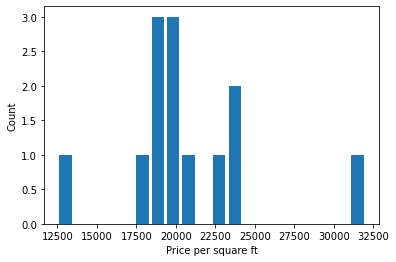

Dasanapura


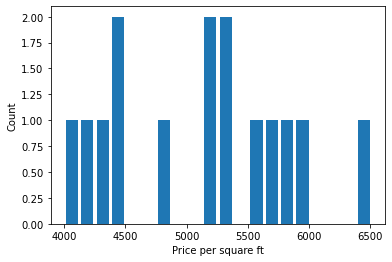

Dasarahalli


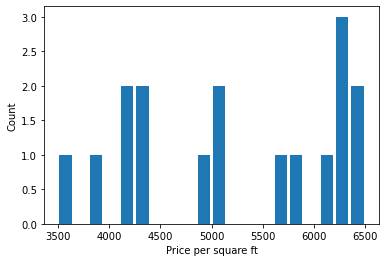

Devanahalli


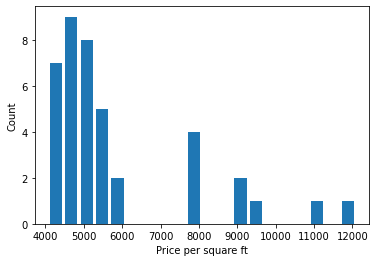

Devarachikkanahalli


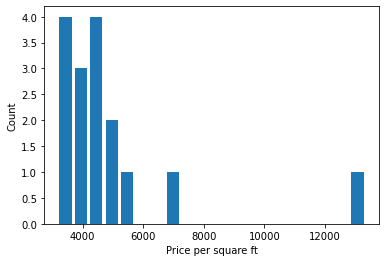

Dodda Nekkundi


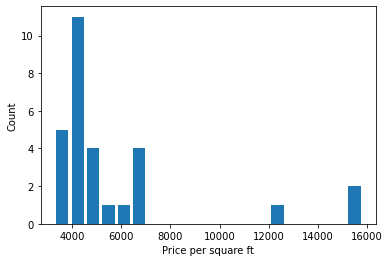

Doddaballapur


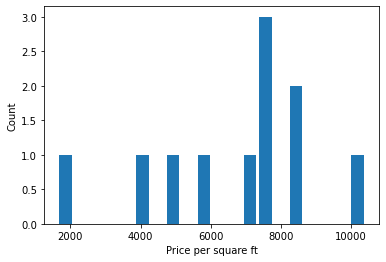

Doddakallasandra


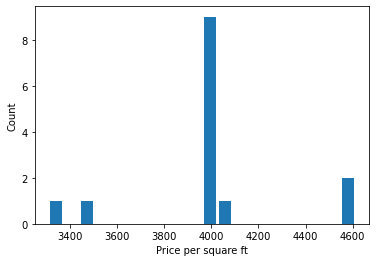

Doddathoguru


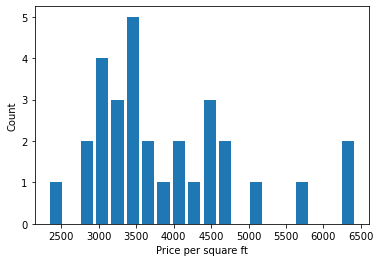

Domlur


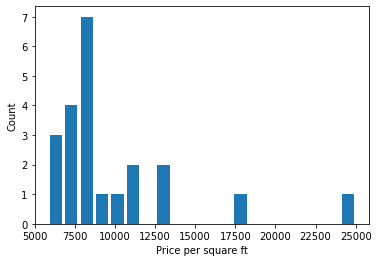

Dommasandra


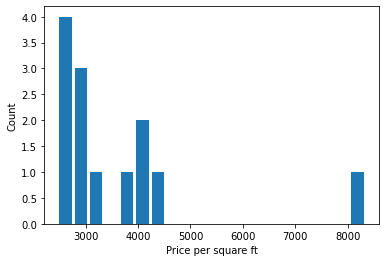

EPIP Zone


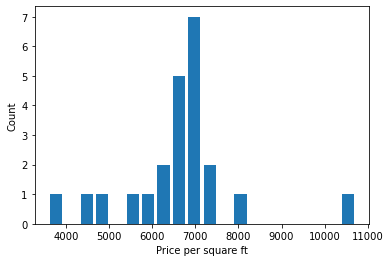

Electronic City


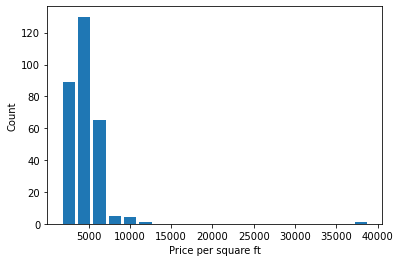

Electronic City Phase II


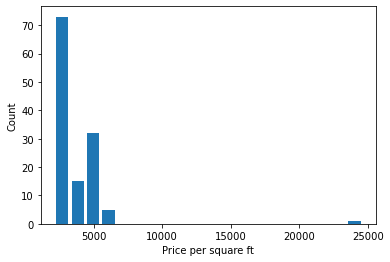

Electronics City Phase 1


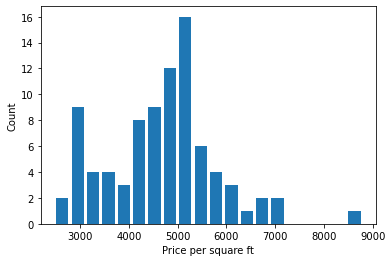

Frazer Town


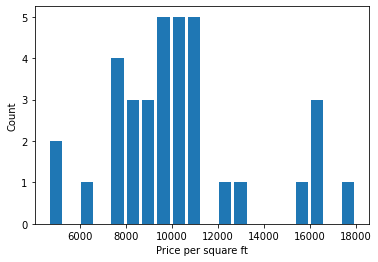

GM Palaya


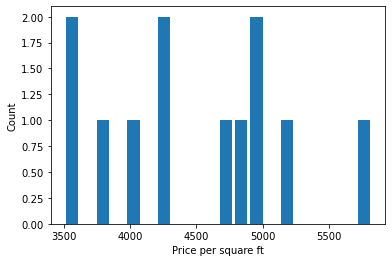

Garudachar Palya


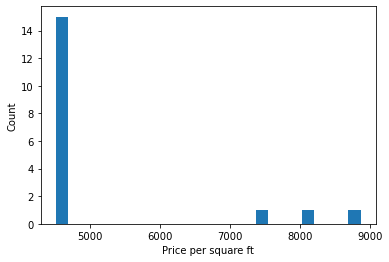

Giri Nagar


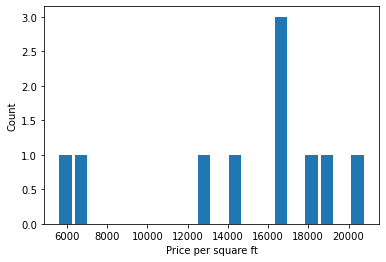

Gollarapalya Hosahalli


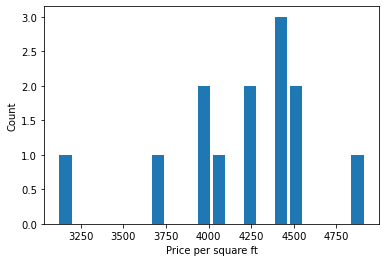

Gottigere


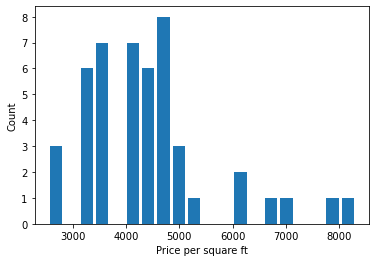

Green Glen Layout


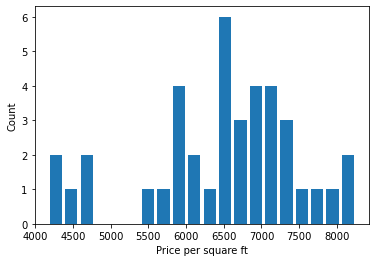

Gubbalala


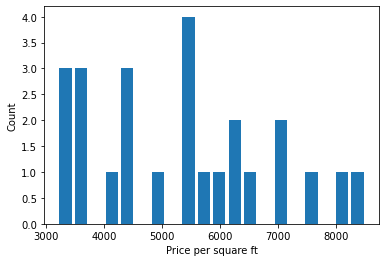

Gunjur


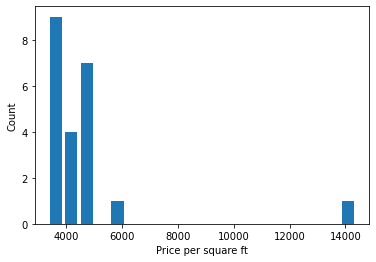

HAL 2nd Stage


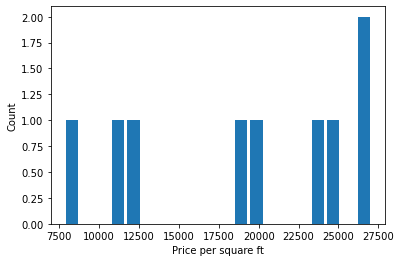

HBR Layout


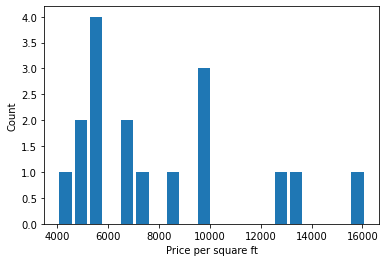

HRBR Layout


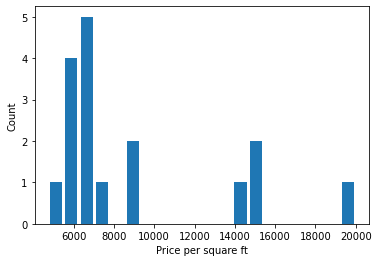

HSR Layout


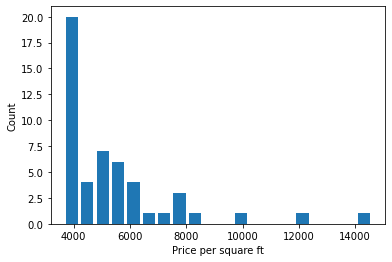

Haralur Road


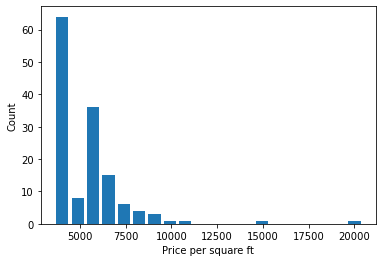

Harlur


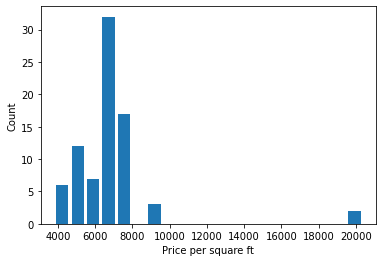

Hebbal


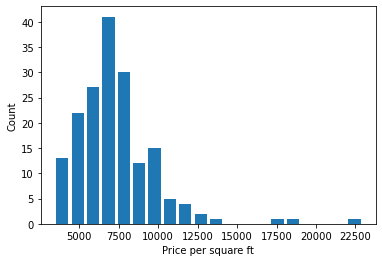

Hebbal Kempapura


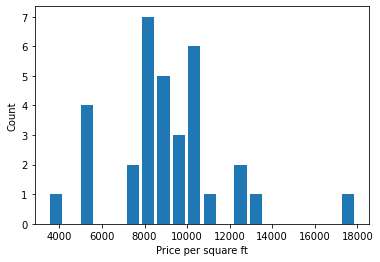

Hegde Nagar


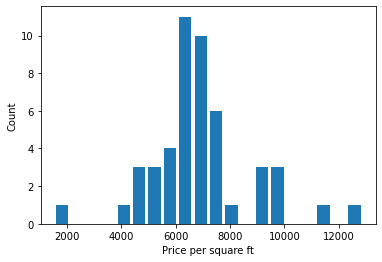

Hennur


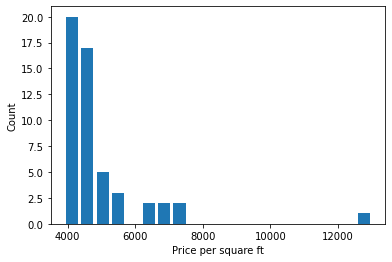

Hennur Road


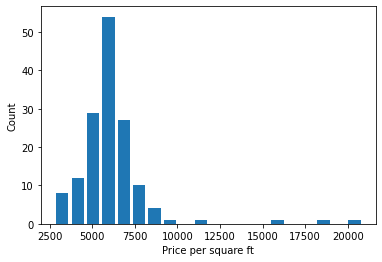

Hoodi


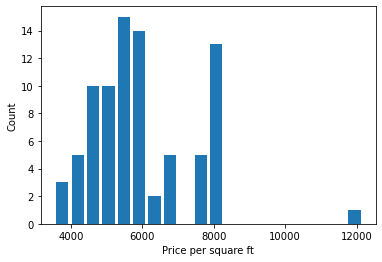

Horamavu Agara


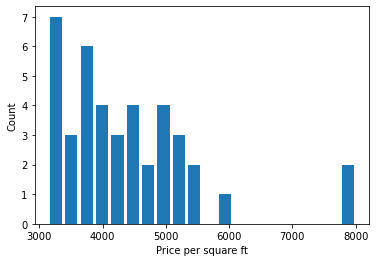

Horamavu Banaswadi


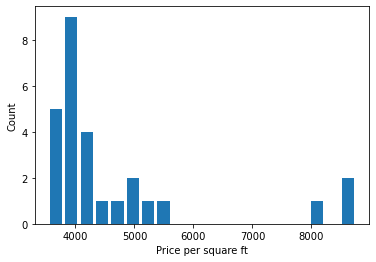

Hormavu


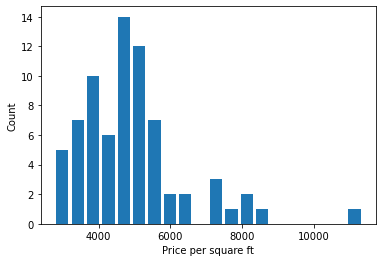

Hosa Road


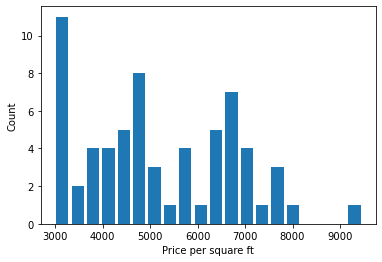

Hosakerehalli


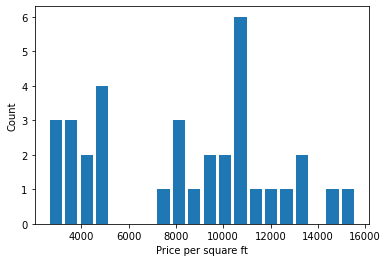

Hoskote


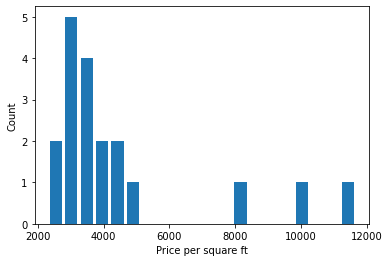

Hosur Road


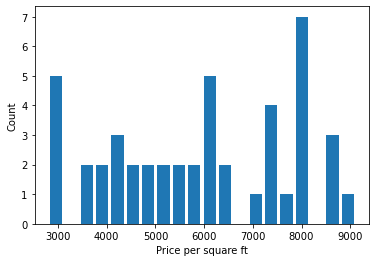

Hulimavu


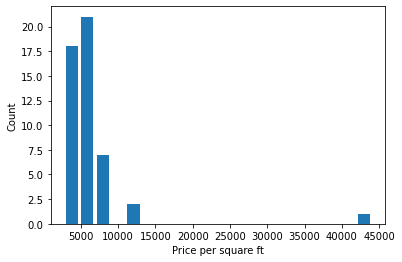

ISRO Layout


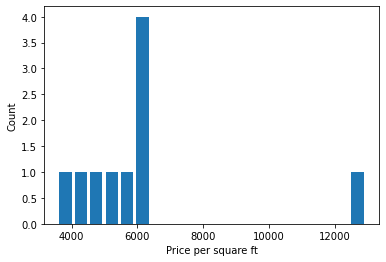

ITPL


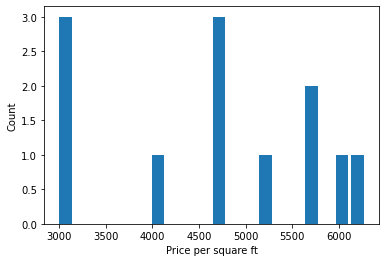

Iblur Village


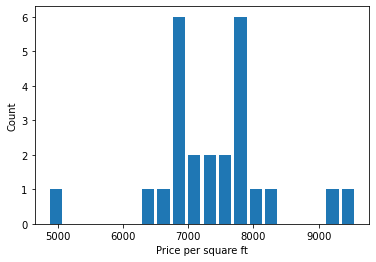

Indira Nagar


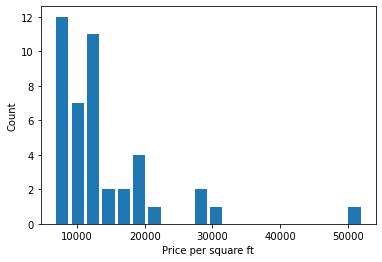

JP Nagar


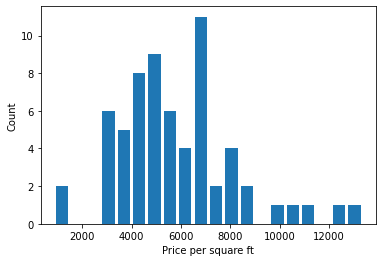

Jakkur


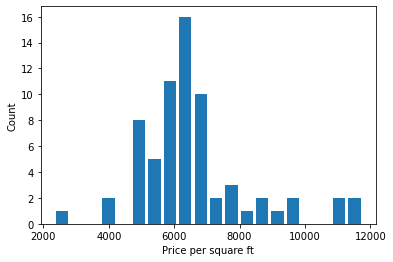

Jalahalli


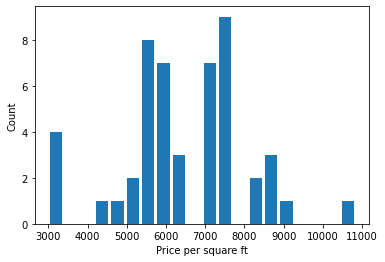

Jalahalli East


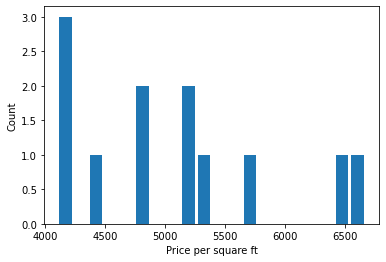

Jigani


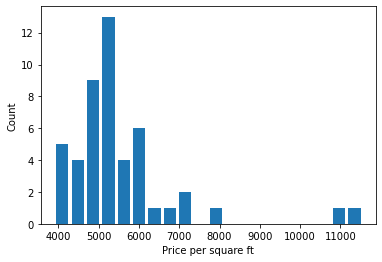

Judicial Layout


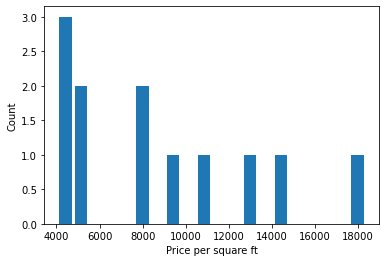

KR Puram


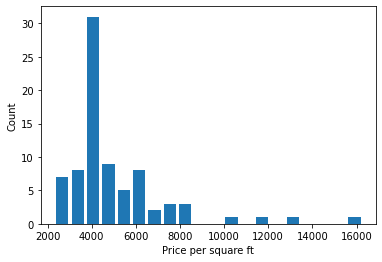

Kadubeesanahalli


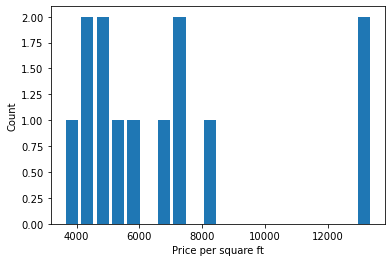

Kadugodi


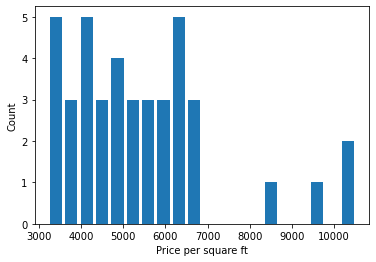

Kaggadasapura


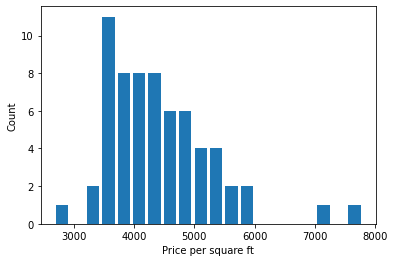

Kaggalipura


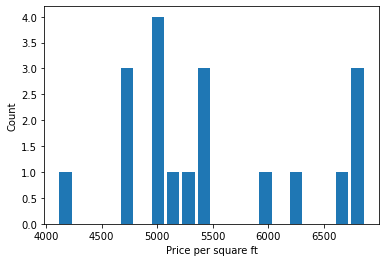

Kaikondrahalli


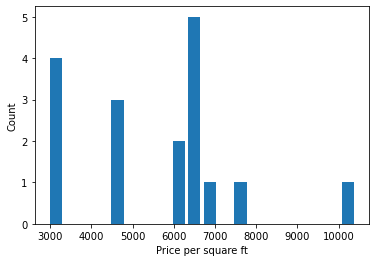

Kalena Agrahara


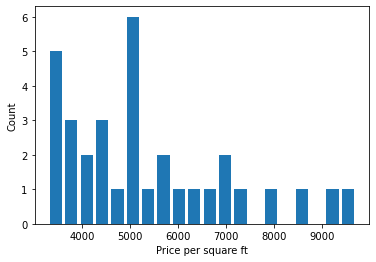

Kalyan nagar


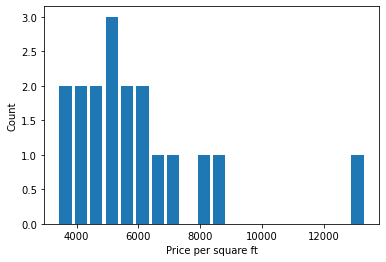

Kambipura


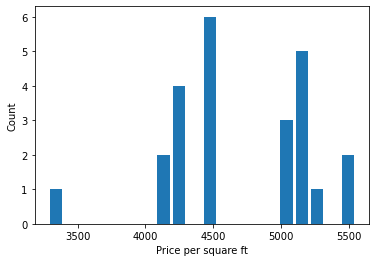

Kammanahalli


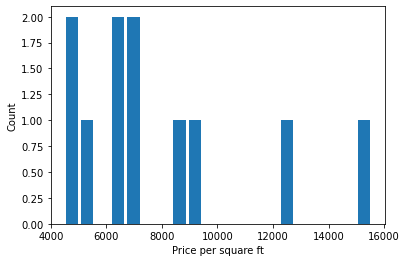

Kammasandra


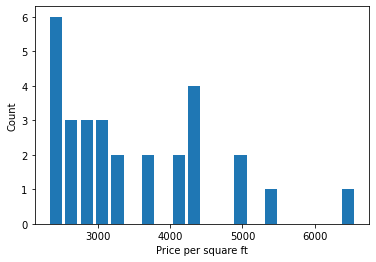

Kanakapura


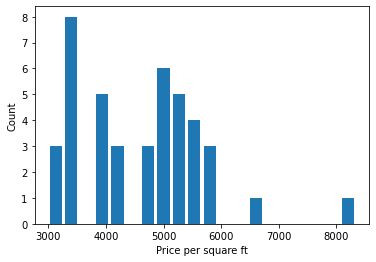

Kanakpura Road


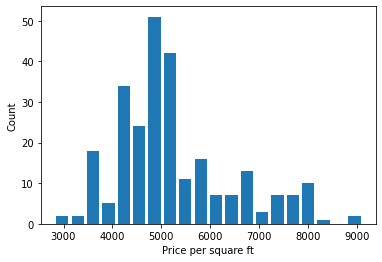

Kannamangala


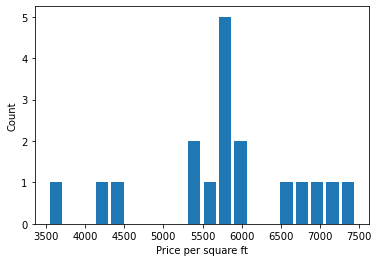

Karuna Nagar


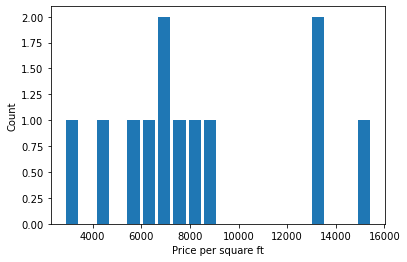

Kasavanhalli


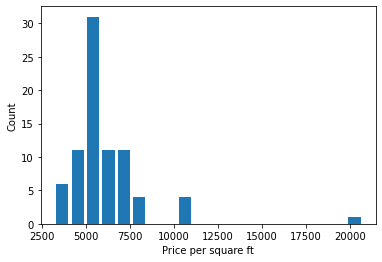

Kasturi Nagar


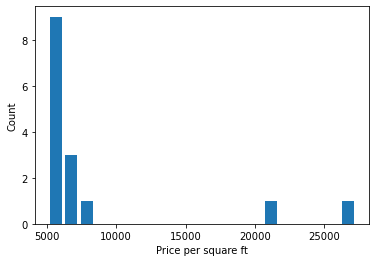

Kathriguppe


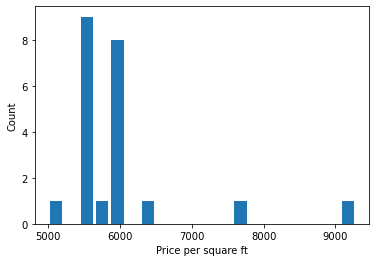

Kaval Byrasandra


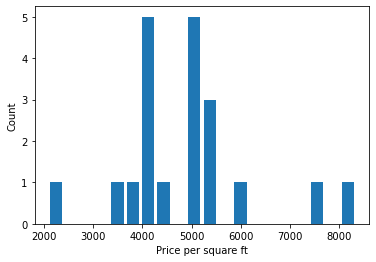

Kenchenahalli


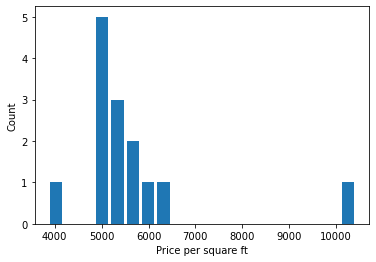

Kengeri


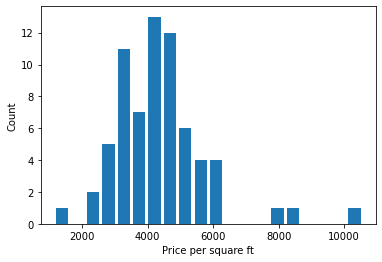

Kengeri Satellite Town


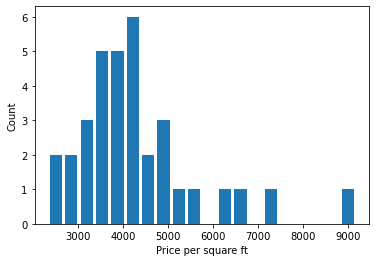

Kereguddadahalli


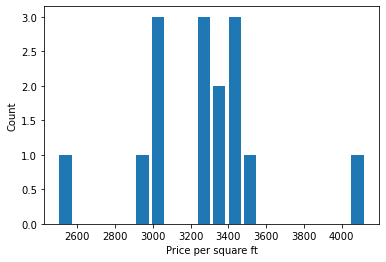

Kodichikkanahalli


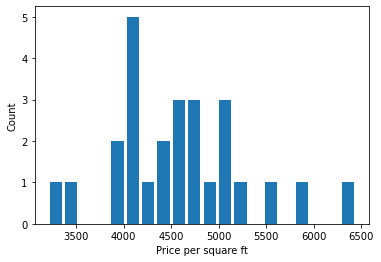

Kodigehaali


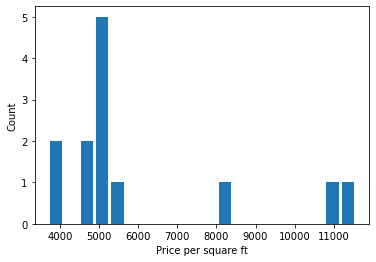

Kodigehalli


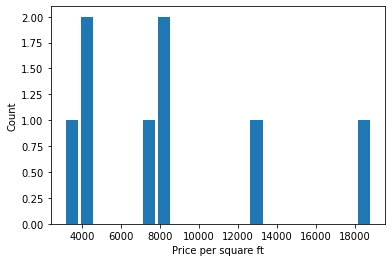

Kodihalli


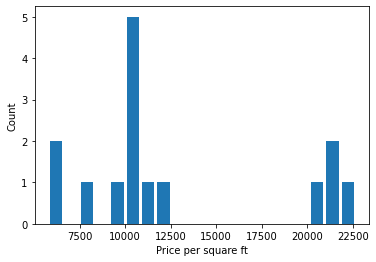

Kogilu


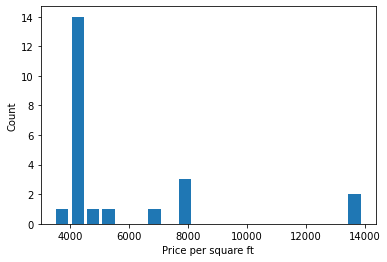

Konanakunte


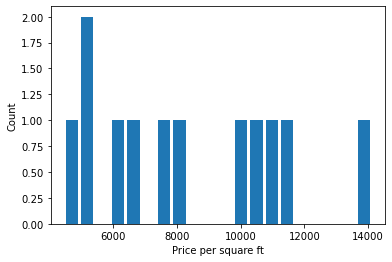

Koramangala


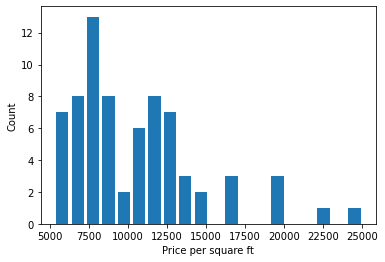

Kothannur


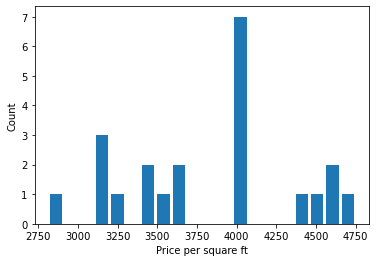

Kothanur


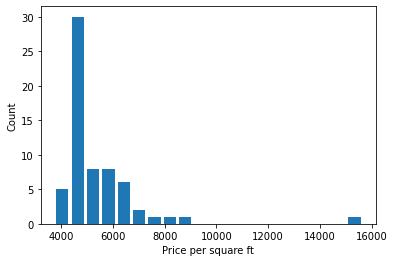

Kudlu


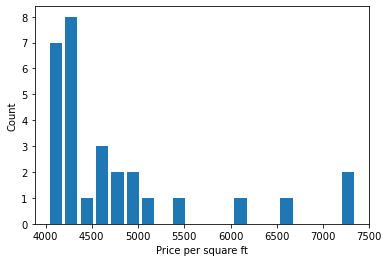

Kudlu Gate


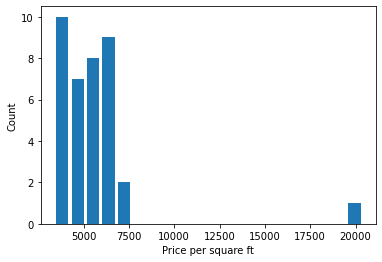

Kumaraswami Layout


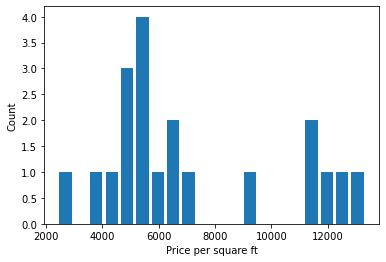

Kundalahalli


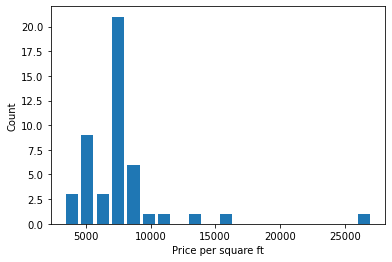

LB Shastri Nagar


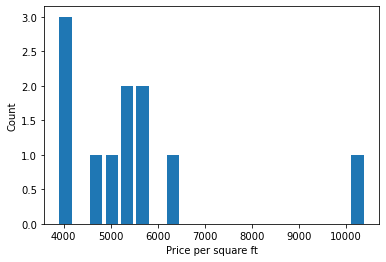

Laggere


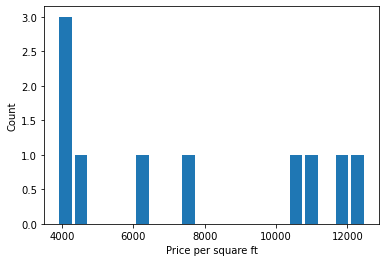

Lakshminarayana Pura


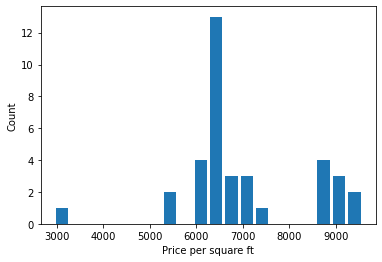

Lingadheeranahalli


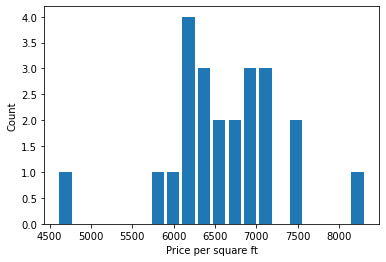

Magadi Road


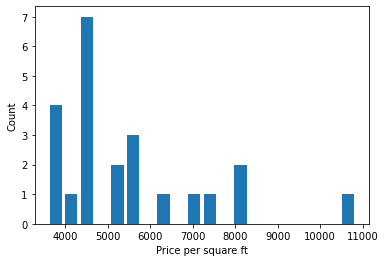

Mahadevpura


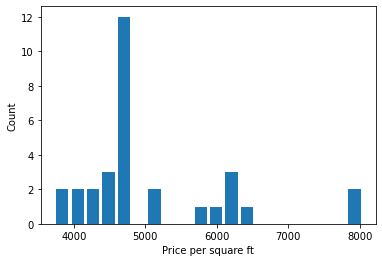

Mahalakshmi Layout


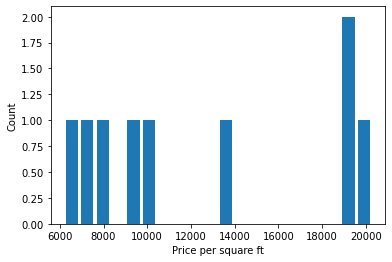

Mallasandra


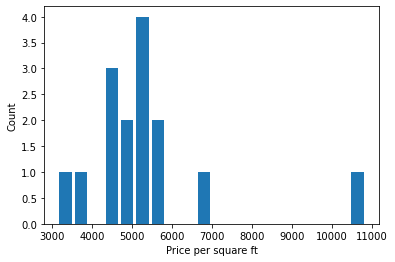

Malleshpalya


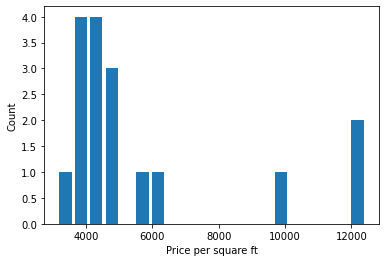

Malleshwaram


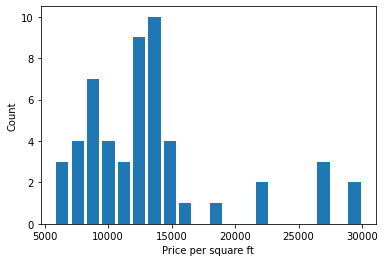

Marathahalli


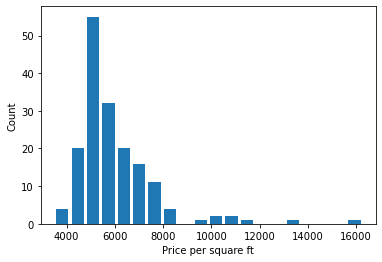

Margondanahalli


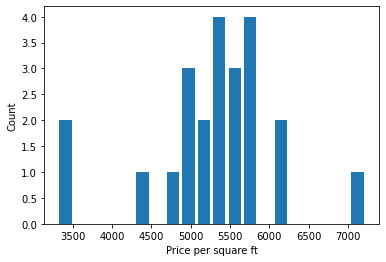

Marsur


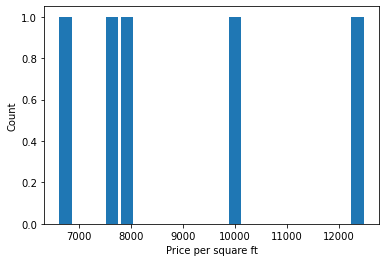

Mico Layout


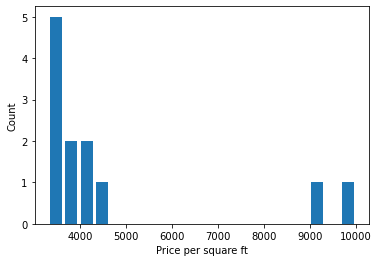

Munnekollal


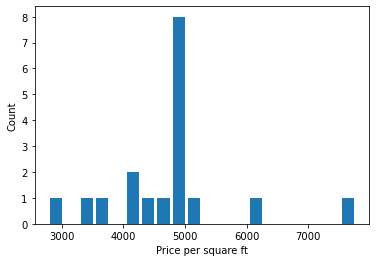

Murugeshpalya


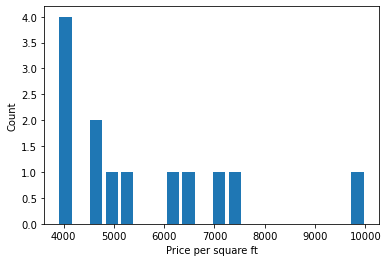

Mysore Road


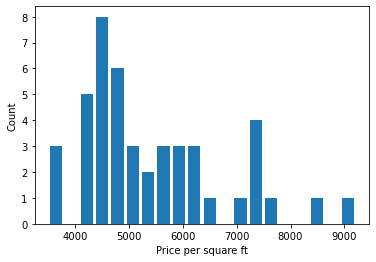

NGR Layout


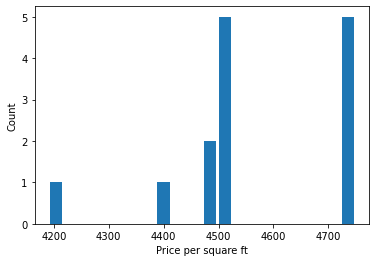

NRI Layout


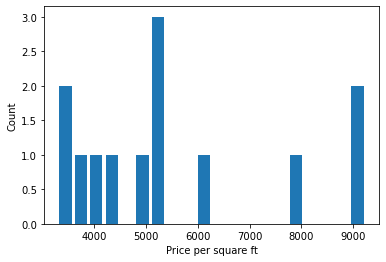

Nagarbhavi


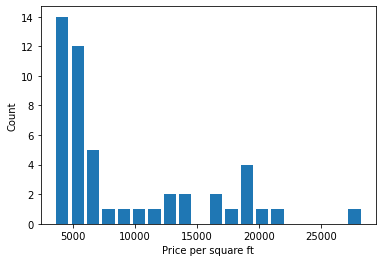

Nagasandra


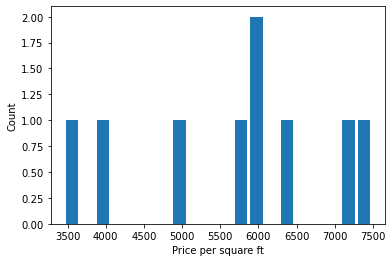

Nagavara


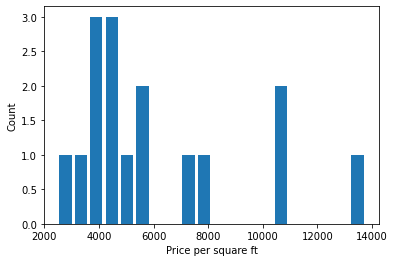

Nagavarapalya


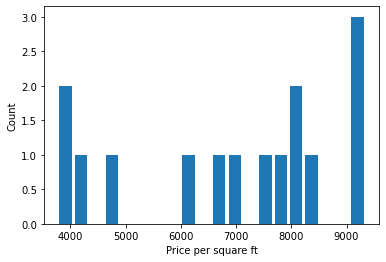

Narayanapura


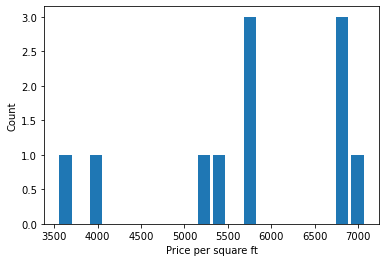

Neeladri Nagar


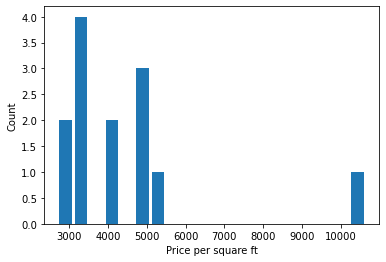

Nehru Nagar


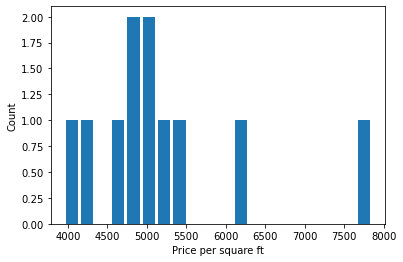

OMBR Layout


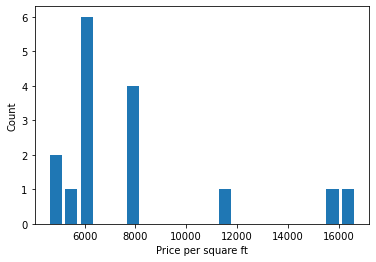

Old Airport Road


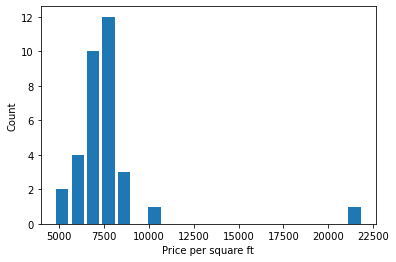

Old Madras Road


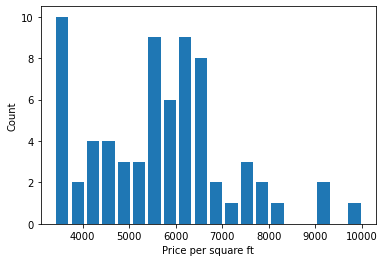

Padmanabhanagar


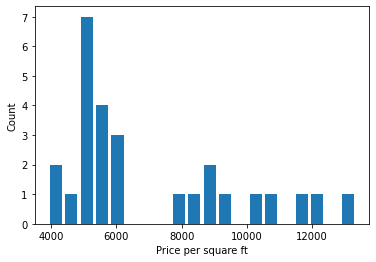

Pai Layout


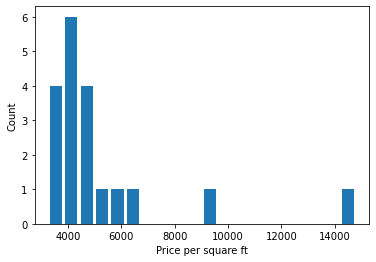

Panathur


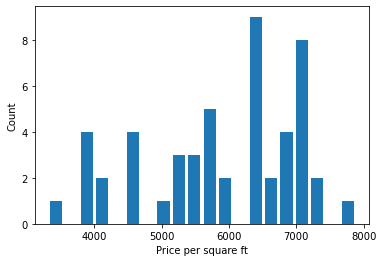

Parappana Agrahara


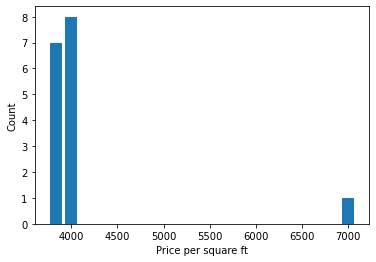

Pattandur Agrahara


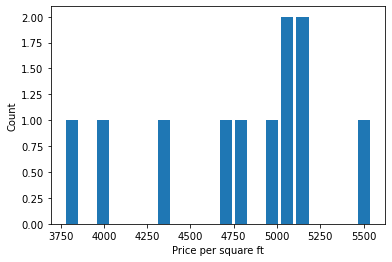

Poorna Pragna Layout


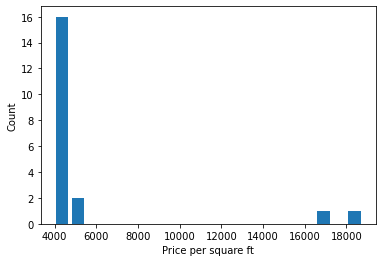

Prithvi Layout


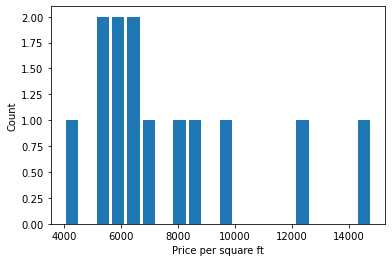

R.T. Nagar


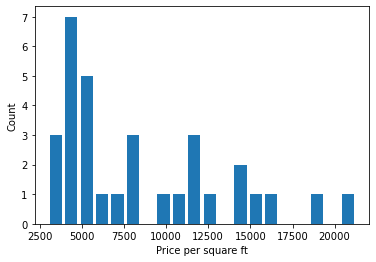

Rachenahalli


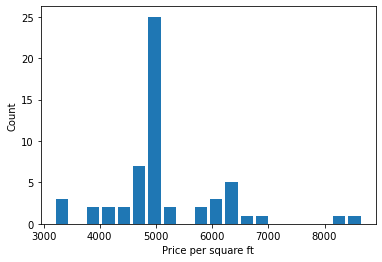

Raja Rajeshwari Nagar


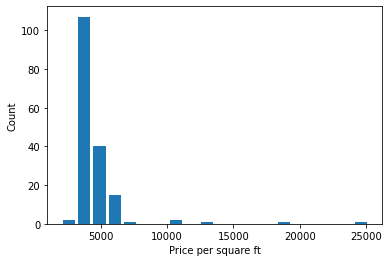

Rajaji Nagar


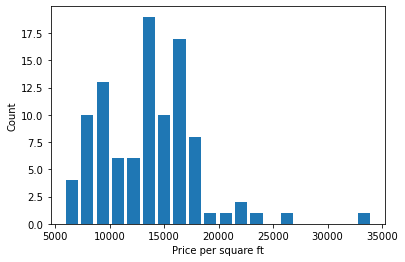

Rajiv Nagar


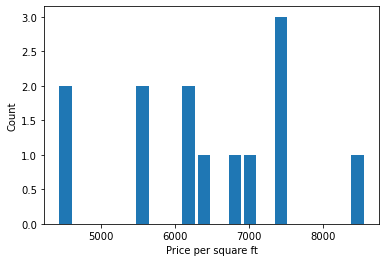

Ramagondanahalli


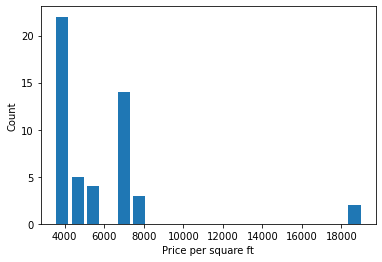

Ramamurthy Nagar


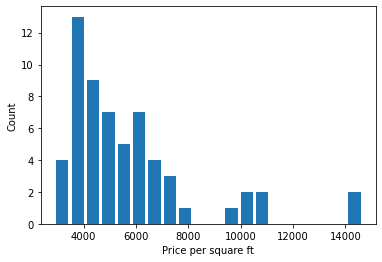

Rayasandra


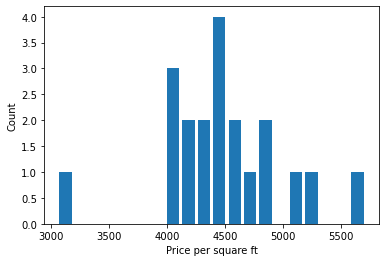

Sahakara Nagar


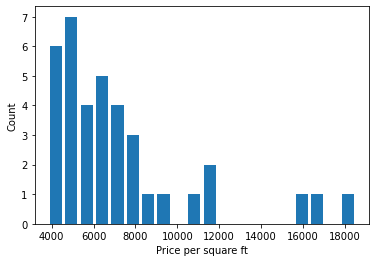

Sanjay nagar


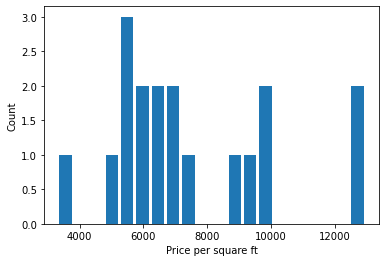

Sarakki Nagar


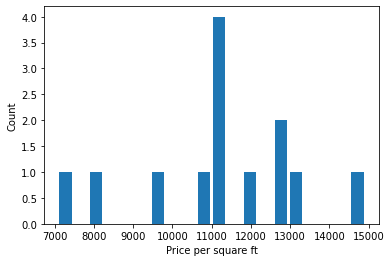

Sarjapur


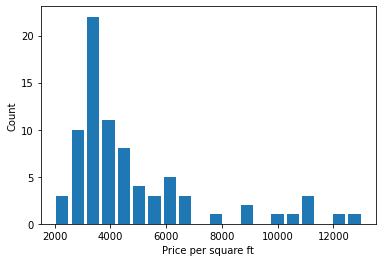

Sarjapur  Road


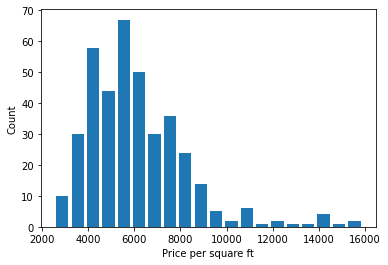

Sarjapura - Attibele Road


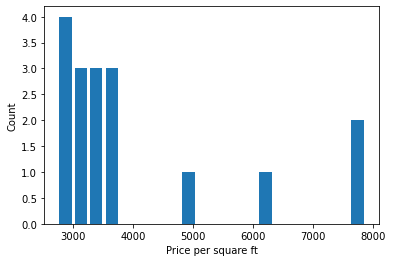

Sector 2 HSR Layout


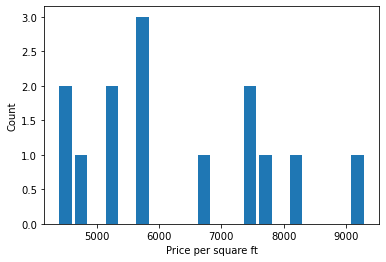

Sector 7 HSR Layout


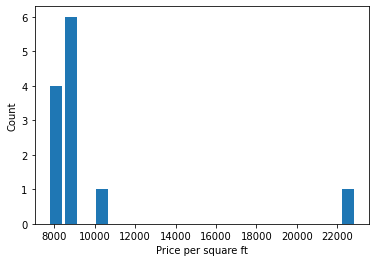

Seegehalli


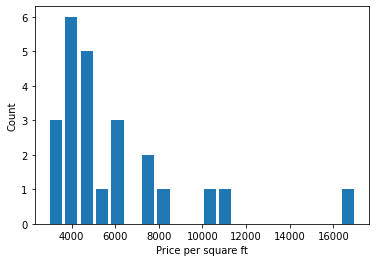

Shampura


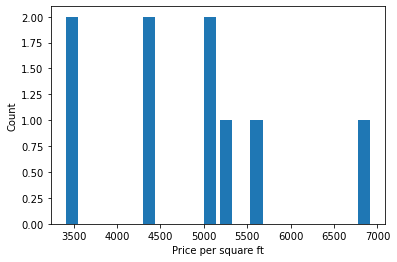

Shivaji Nagar


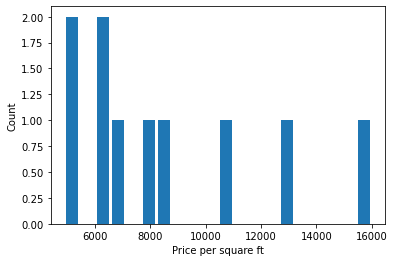

Singasandra


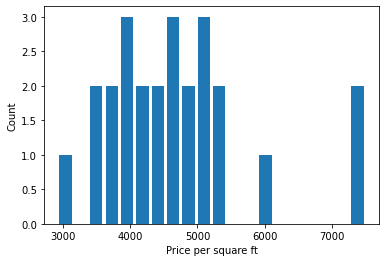

Somasundara Palya


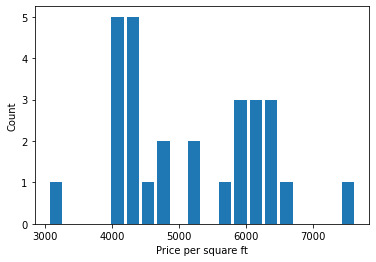

Sompura


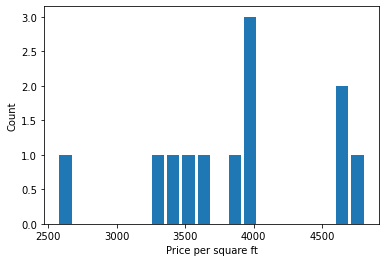

Sonnenahalli


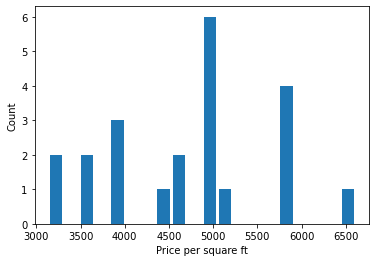

Subramanyapura


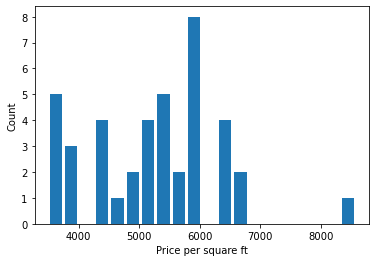

Sultan Palaya


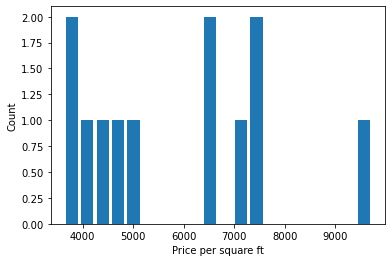

TC Palaya


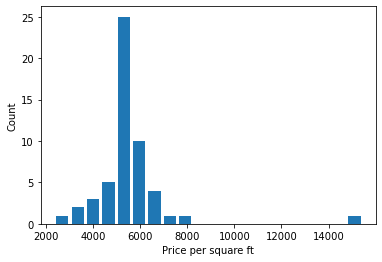

Talaghattapura


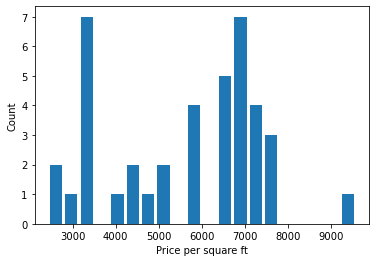

Thanisandra


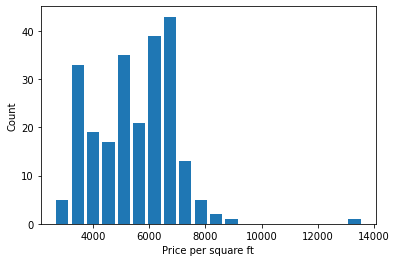

Thigalarapalya


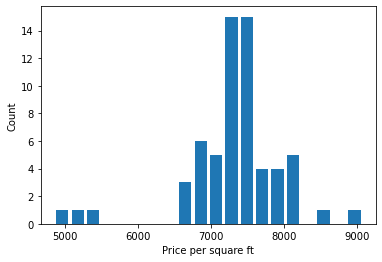

Thubarahalli


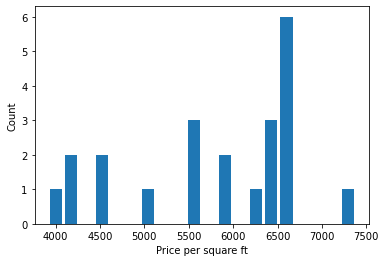

Tindlu


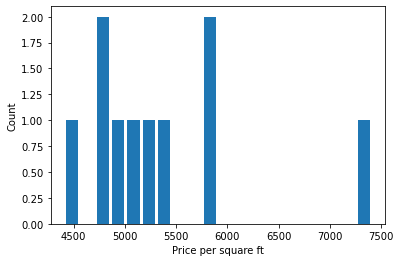

Tumkur Road


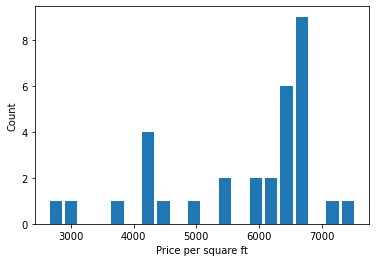

Ulsoor


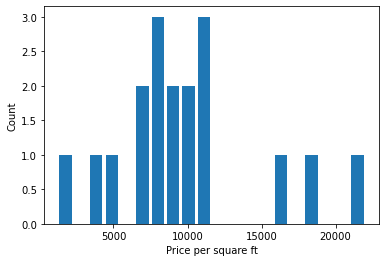

Uttarahalli


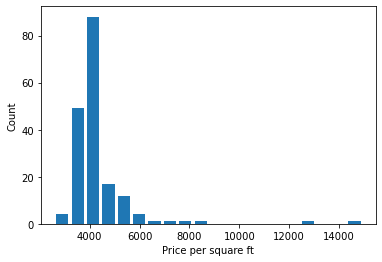

Varthur


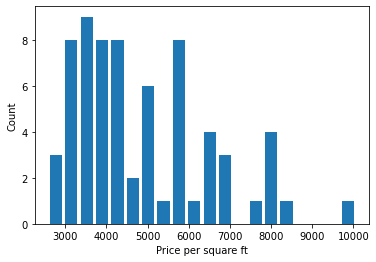

Varthur Road


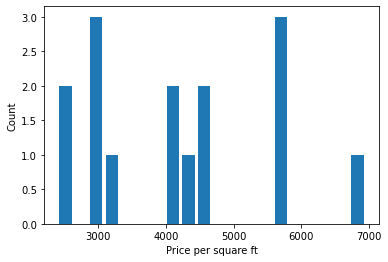

Vasanthapura


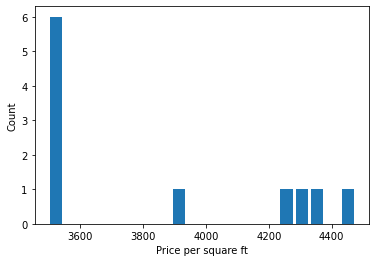

Vidyaranyapura


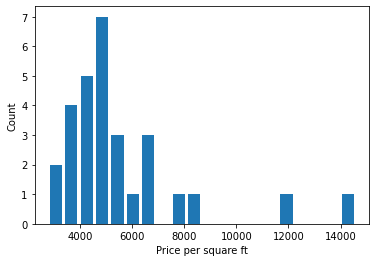

Vijayanagar


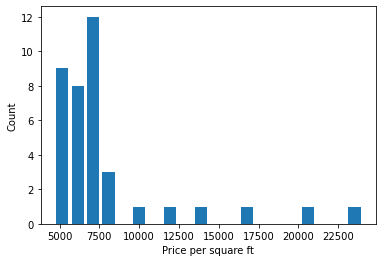

Vishveshwarya Layout


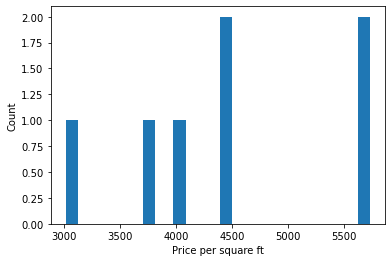

Vishwapriya Layout


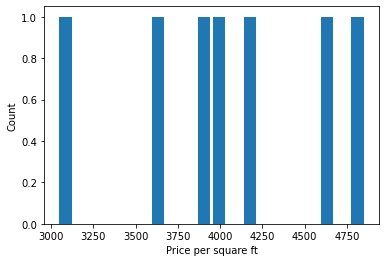

Vittasandra


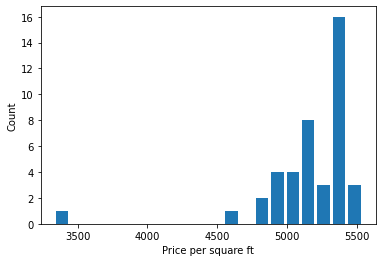

Whitefield


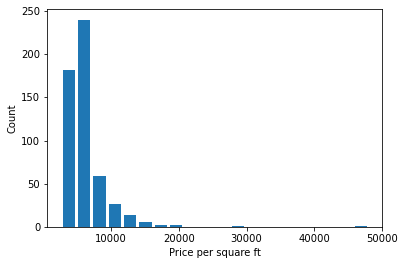

Yelachenahalli


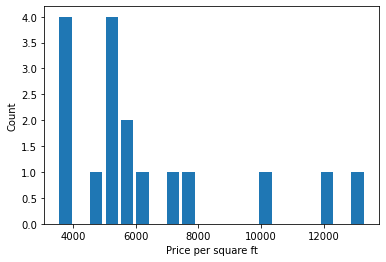

Yelahanka


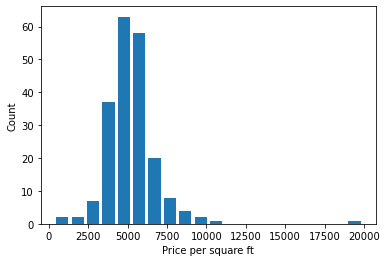

Yelahanka New Town


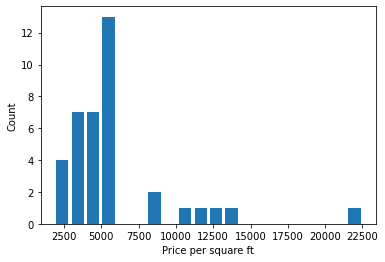

Yelenahalli


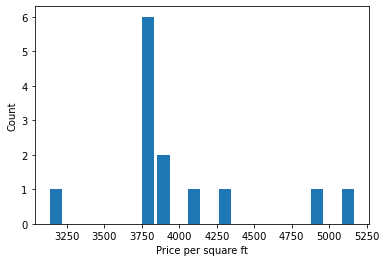

Yeshwanthpur


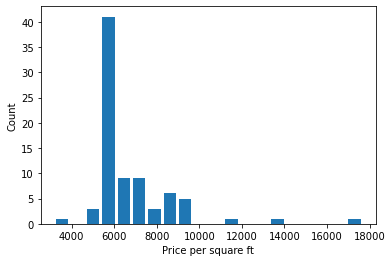

other


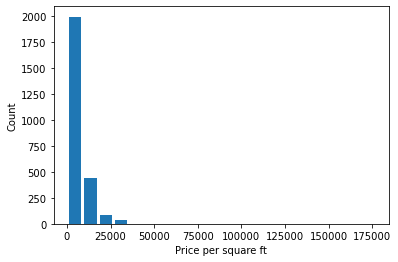

,location,size,total_sqft,bath,price,bhk,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
13285,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [81]:
df6= pd.DataFrame()                     # Temporary dataframe(initial df)
for i, j in df5.groupby('location'):
    mean = np.mean(j.price_per_sqft)         # mean values
    std_dev = np.std(j.price_per_sqft)       # standard dev values
    lower_limit = mean - 1*std_dev           # Taking 1 sta dev for lower limit
    upper_limit = mean + 1*std_dev           # Taking 1 sta dev for upper limit
    j_df= j[(j.price_per_sqft>lower_limit) & (j.price_per_sqft<upper_limit)] # instance dataframe
    print (i)
    plt.hist(j.price_per_sqft, bins=20, rwidth=0.8)
    plt.xlabel('Price per square ft')
    plt.ylabel('Count')
    plt.show()
    df6 = pd.concat([df6, j_df])     # concatenating instance df to initial df
df6

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like** 

    (total_sqft vs price) comparison for different bhk
    
    
    

In [124]:
def groupby_df(df,column_name1):
    new_df1= pd.DataFrame()                     # Temporary dataframe(initial df)
    for i, j in df.groupby(column_name1):
        new_df1 = pd.concat([new_df1, j])     # concatenating instance df to initial df
    return new_df1

In [178]:
df_new = groupby_df(df6,'total_sqft')
df_new[(df_new.total_sqft>1600) & (df_new.total_sqft<1800) & (df.location == 'Rajaji Nagar')]
# observe last 3 : for 2bhk the price is more than 3 bhk for almost same sqft

C:\Users\DELL\AppData\Local\Temp\ipykernel_3304\2316369345.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new[(df_new.total_sqft>1600) & (df_new.total_sqft<1800) & (df.location == 'Rajaji Nagar')]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
7971,Rajaji Nagar,3 BHK,1613.0,3.0,150.0,3,9299.442033
6931,Rajaji Nagar,3 BHK,1615.0,3.0,175.0,3,10835.913313
107,Rajaji Nagar,3 BHK,1640.0,3.0,229.0,3,13963.414634
1931,Rajaji Nagar,3 BHK,1640.0,3.0,223.0,3,13597.560976
3100,Rajaji Nagar,3 BHK,1640.0,3.0,241.0,3,14695.121951
5799,Rajaji Nagar,3 BHK,1640.0,3.0,230.0,3,14024.390244
6473,Rajaji Nagar,3 BHK,1640.0,3.0,220.0,3,13414.634146
7789,Rajaji Nagar,3 BHK,1640.0,3.0,220.0,3,13414.634146
9124,Rajaji Nagar,3 BHK,1640.0,3.0,262.0,3,15975.609756
9729,Rajaji Nagar,3 BHK,1640.0,3.0,251.0,3,15304.878049


Trial__

In [93]:
df6[(df6.location=="Rajaji Nagar") & (df6.bhk ==2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3118,Rajaji Nagar,2 BHK,1370.0,2.0,170.0,2,12408.759124
3806,Rajaji Nagar,2 BHK,1718.0,3.0,288.0,2,16763.678696
4114,Rajaji Nagar,2 Bedroom,1200.0,2.0,150.0,2,12500.000000
4124,Rajaji Nagar,2 Bedroom,1160.0,1.0,163.0,2,14051.724138
5313,Rajaji Nagar,2 BHK,1440.0,2.0,170.0,2,11805.555556
5595,Rajaji Nagar,2 BHK,1440.0,2.0,185.0,2,12847.222222
6345,Rajaji Nagar,2 BHK,1357.0,2.0,130.0,2,9579.955785
7675,Rajaji Nagar,2 BHK,1763.0,3.0,262.0,2,14861.032331
9089,Rajaji Nagar,2 BHK,1268.0,2.0,127.0,2,10015.772871
9193,Rajaji Nagar,2 Bedroom,1200.0,1.0,200.0,2,16666.666667


In [99]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)] # sorting 2bhk and entered location
    bhk3 = df[(df.location==location) & (df.bhk==3)] # sorting 3bhk and entered location
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    
    plt.title(location)
    plt.legend()

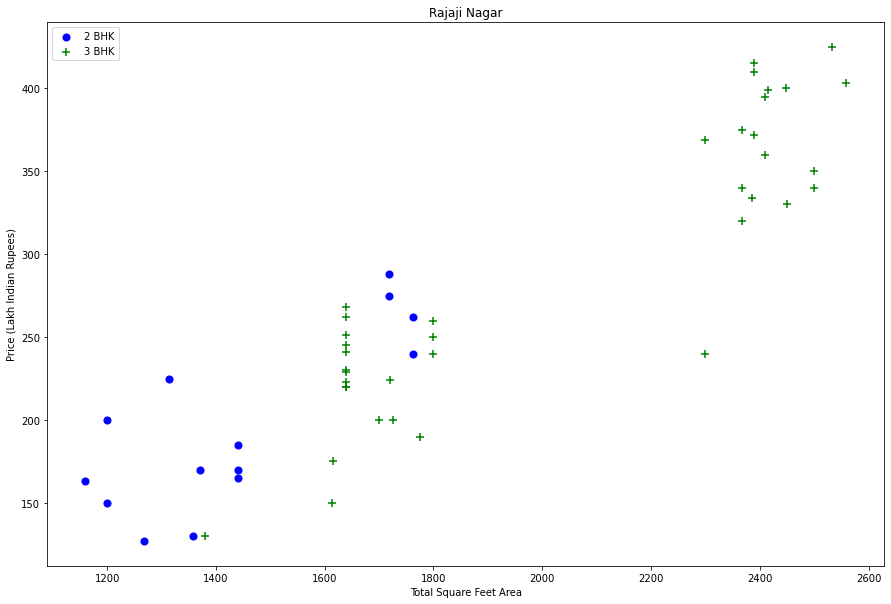

In [100]:
plot_scatter_chart(df6,"Rajaji Nagar")

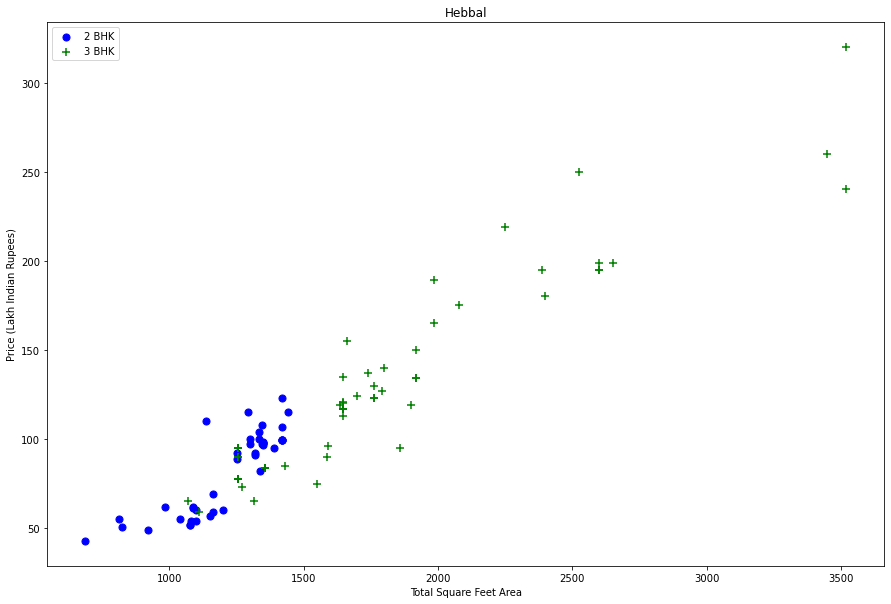

In [101]:
plot_scatter_chart(df6,"Hebbal")

In [188]:
for location, location_df in df6.groupby('location'):
    bhk_stats = []
    for bhk, bhk_df in location_df.groupby('bhk'):
        bhk_stats.append ({
            'bhk': bhk,
            'mean': np.mean(bhk_df.price_per_sqft),
            'std': np.std(bhk_df.price_per_sqft),
            'count': bhk_df.shape[0]
        })
pd_stats = pd.DataFrame(bhk_stats)
pd_stats

,bhk,mean,std,count
0,1,5375.333572,2429.307279,133
1,2,5294.561668,1980.202800,985
2,3,6304.571455,2550.903993,859
3,4,8334.159252,2892.965687,224
4,5,7189.330917,3343.937869,42
5,6,6975.562369,3043.304541,34
6,7,4416.045150,1880.804747,12
7,8,5384.347002,1946.629882,7
8,9,5530.842391,3234.230886,4
9,10,9005.681818,4630.681818,2


In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):   #groups by location and create new df for each location
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape